# **Used Cars Dataset Analysis:**

**Data Source:** __https://www.kaggle.com/competitions/playground-series-s4e9/data?select=train.csv__

| **Column Name**   | **Description** |
|-------------------|-----------------|
| **id**            | A unique identifier for each listing or entry in the dataset. Not useful for analysis but important for indexing or tracking records. |
| **brand**         | The manufacturer of the car (e.g., Toyota, BMW, Ford). Useful for brand-wise comparison and price trends. |
| **model**         | The specific model of the car within the brand (e.g., Corolla, X5, Mustang). Together with brand, this helps identify the vehicle type. |
| **model_year**    | The manufacturing year of the car. It gives you the age of the car, which is crucial for depreciation and pricing. |
| **milage**        | The total distance the car has traveled, usually in miles or kilometers. A key indicator of vehicle usage and wear. |
| **fuel_type**     | The type of fuel the car uses (e.g., Petrol, Diesel, Electric, Hybrid). Useful for analyzing fuel efficiency and emissions. |
| **engine**        | Typically indicates engine size or capacity (e.g., 2.0L, 1800cc). Larger engines may imply more power but lower fuel efficiency. |
| **transmission**  | Indicates whether the car has a manual or automatic transmission. Preferences for this vary by region and price bracket. |
| **ext_col**       | Exterior color of the car (e.g., Red, Black, White). Can be useful for preferences and resale value analysis. |
| **int_col**       | Interior color of the car. Less important than exterior color but could influence buyer preferences. |
| **accident**      | Indicates whether the car has been in an accident (Yes/No). This can affect the value significantly. |
| **clean_title**   | Indicates if the car has a clean title (i.e., not salvaged or rebuilt). A "clean title" means no major legal or damage history, boosting its market value. |
| **price**         | The selling price of the car. This is usually your **target variable** if you're doing price prediction. |

### **Example Analysis Ideas:**
- **Depreciation Analysis**: Compare `model_year` and `price` to see how value drops over time.
- **Brand Value**: Group by `brand` and analyze average `price`, `milage`, or `accident` frequency.
- **Fuel Preference**: Analyze price or mileage trends across different `fuel_type`.
- **Impact of Accidents**: Compare prices between cars with and without `accident` history.
- **Transmission & Price**: See if automatic cars are priced higher than manual ones.

### 1. **Dependencies and Data Loading:**

In [182]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as slr
import scipy as sp

In [183]:
# Load the dataset:
data= pd.read_csv('C:/Users/MyMachine/Desktop/Mission-Project/00_DataSets/18_Used_Car_Train_DataSet.csv')

In [184]:
print(data.shape)
print(f"Total Number of Rows: {data.shape[0]}")  
print(F"Total Number of Columns: {data.shape[1]}")

(188533, 13)
Total Number of Rows: 188533
Total Number of Columns: 13


In [185]:
data.columns

Index(['id', 'brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price'],
      dtype='object')

----

### 2. **Check for Missing Values:**

In [186]:
data.isnull().sum()

id                  0
brand               0
model               0
model_year          0
milage              0
fuel_type        5083
engine              0
transmission        0
ext_col             0
int_col             0
accident         2452
clean_title     21419
price               0
dtype: int64

In [187]:
data["fuel_type"].unique()

array(['Gasoline', 'E85 Flex Fuel', nan, 'Hybrid', 'Diesel',
       'Plug-In Hybrid', '–', 'not supported'], dtype=object)

For now we will leave this column unchanged and later if we need to handel NaN values then only we will handel them.

`clean_title` column already containd `Yes` and so the NaN will likely be `No`. So, we will repalce the NaN with `No` in the `clean_title` column.

In [188]:
data["clean_title"].unique()

array(['Yes', nan], dtype=object)

In `accident` column, null values generally represent `no accident`. So, we replace `null` with `No` in `accident` column.

In [189]:
data["accident"].unique()

array(['None reported', 'At least 1 accident or damage reported', nan],
      dtype=object)

In [190]:
# Step 1: Check missing values:
print("🔍 Missing Values BEFORE Handling:")
print(data.isna().sum())

# Step 2: Handle missing values with custom logic
# For 'accident' column, NaN means "No"
data['accident'] = data['accident'].fillna('No')

# For 'clean_title' column, NaN means "No"
data['clean_title'] = data['clean_title'].fillna('No')

# NOTE: Leave 'fuel_type' as-is, do not fill its NaNs

# Step 3: Check missing values AFTER
print("\n✅ Missing Values AFTER Handling:")
print(data.isna().sum())


🔍 Missing Values BEFORE Handling:
id                  0
brand               0
model               0
model_year          0
milage              0
fuel_type        5083
engine              0
transmission        0
ext_col             0
int_col             0
accident         2452
clean_title     21419
price               0
dtype: int64

✅ Missing Values AFTER Handling:
id                 0
brand              0
model              0
model_year         0
milage             0
fuel_type       5083
engine             0
transmission       0
ext_col            0
int_col            0
accident           0
clean_title        0
price              0
dtype: int64


-----

### 3. **Summary Statistics:**

In [191]:
data.describe()

,id,model_year,milage,price
count,"188,533.00","188,533.00","188,533.00","188,533.00"
mean,"94,266.00","2,015.83","65,705.30","43,878.02"
std,"54,424.93",5.66,"49,798.16","78,819.52"
min,0.00,"1,974.00",100.00,"2,000.00"
25%,"47,133.00","2,013.00","24,115.00","17,000.00"
50%,"94,266.00","2,017.00","57,785.00","30,825.00"
75%,"141,399.00","2,020.00","95,400.00","49,900.00"
max,"188,532.00","2,024.00","405,000.00","2,954,083.00"


1. **`Count`**: There are `188,533` entries in the dataset for the price column, indicating a substantial sample size for analysis.

2. **`Mean (Average Price)`**: The average price of the items is approximately `$43,878.02`. This value provides a general idea of the typical price within the dataset.

3. **`Standard Deviation`**: The standard deviation is `$78,819.52`, which is quite high relative to the mean. This suggests that there is considerable variability in the prices; some prices are significantly higher or lower than the average.

4. **`Minimum Price`**: The lowest recorded price in the dataset is `$2,000`. This indicates the bottom end of the pricing spectrum.

5. **`25th Percentile (Q1)`**: 25% of the prices are below `$17,000`. This indicates that a significant portion of the dataset consists of lower-priced items.

6. **`Median (50th Percentile)`**: The median price is `$30,825`. This is the middle point of the dataset, indicating that half of the prices are below this value and half are above. The median being lower than the mean suggests a right-skewed distribution.

7. **`75th Percentile (Q3)`**: At the 75th percentile, prices are below `$49,900`. This means that 75% of the items in the dataset are priced lower than this value.

8. **`Maximum Price`**: The highest recorded price is `$2,954,083`. This extreme value greatly contributes to the high standard deviation and indicates that there are a few outlier items with very high prices.

If we also include categorical columns then the statistics appears a little cluttered and some statistics may not be that meaningful. 

In [192]:
data.describe(include="all")

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
count,"188,533.00",188533,188533,"188,533.00","188,533.00",183450,188533,188533,188533,188533,188533,188533,"188,533.00"
unique,NaN,57,1897,NaN,NaN,7,1117,52,319,156,3,2,NaN
top,NaN,Ford,F-150 XLT,NaN,NaN,Gasoline,355.0HP 5.3L 8 Cylinder Engine Gasoline Fuel,A/T,Black,Black,None reported,Yes,NaN
freq,NaN,23088,2945,NaN,NaN,165940,3462,49904,48658,107674,144514,167114,NaN
mean,"94,266.00",NaN,NaN,"2,015.83","65,705.30",NaN,NaN,NaN,NaN,NaN,NaN,NaN,"43,878.02"
std,"54,424.93",NaN,NaN,5.66,"49,798.16",NaN,NaN,NaN,NaN,NaN,NaN,NaN,"78,819.52"
min,0.00,NaN,NaN,"1,974.00",100.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"2,000.00"
25%,"47,133.00",NaN,NaN,"2,013.00","24,115.00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,"17,000.00"
50%,"94,266.00",NaN,NaN,"2,017.00","57,785.00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,"30,825.00"
75%,"141,399.00",NaN,NaN,"2,020.00","95,400.00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,"49,900.00"


----

### 4. **Unique Counts per Column:**

In [193]:
# Get unique counts per column
unique_counts = data.nunique()

print(unique_counts)

id              188533
brand               57
model             1897
model_year          34
milage            6651
fuel_type            7
engine            1117
transmission        52
ext_col            319
int_col            156
accident             3
clean_title          2
price             1569
dtype: int64


In Categorical Columns, Unique Count makes sense.

In [194]:
# Unique counts only for categorical data type columns:
unique_counts = data.select_dtypes(include=['object']).nunique()
print(unique_counts)

brand             57
model           1897
fuel_type          7
engine          1117
transmission      52
ext_col          319
int_col          156
accident           3
clean_title        2
dtype: int64


In [195]:
data.head(1)

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200


So, there are 57 different car brands in this dataset having 1897 different models. 

The dataset contains 7 different fule type cars like Petrol, Diesel, CNG, Electric, Hybrid, LPG and Ethanol etc.

The engine column have 1117 which contains three important information: `number of cylinders`, `engine capacity` and `engine fuel type`. So, this column needs to be separated into three new columns.

In [196]:
# Function to separate engine details
def split_engine_details(engine_str):
    # Split the string by spaces
    parts = engine_str.split(' ')
    
    # Extract values
    engine_power_hp = parts[0].replace('HP', '')  # Remove HP suffix
    engine_capacity = ' '.join(parts[1:4])  # Join next three parts
    engine_fuel_type = ' '.join(parts[4:])  # Join the remaining parts

    return engine_power_hp, engine_capacity, engine_fuel_type

# Apply the function to the 'engine' column and create new columns
data[['engine_power_hp', 'engine_capacity', 'engine_fuel_type']] = data['engine'].apply(split_engine_details).apply(pd.Series)

# Drop the original 'engine' column
data.drop(columns=['engine'], inplace=True)

In [197]:
data.columns

Index(['id', 'brand', 'model', 'model_year', 'milage', 'fuel_type',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price', 'engine_power_hp', 'engine_capacity', 'engine_fuel_type'],
      dtype='object')

In [198]:
data.head(1)

,id,brand,model,model_year,milage,fuel_type,transmission,ext_col,int_col,accident,clean_title,price,engine_power_hp,engine_capacity,engine_fuel_type
0,0,MINI,Cooper S Base,2007,213000,Gasoline,A/T,Yellow,Gray,None reported,Yes,4200,172.0,1.6L 4 Cylinder,Engine Gasoline Fuel


In [199]:
data["engine_fuel_type"]= data["engine_fuel_type"].str.replace("Engine", "")

In [200]:
data["engine_capacity"].head(5)

0    1.6L 4 Cylinder
1    3.9L 8 Cylinder
2    5.3L 8 Cylinder
3    5.0L 8 Cylinder
4    2.0L 4 Cylinder
Name: engine_capacity, dtype: object

The `engine_capacity` column can also be further adjusted. Consider, `engine_capacity= 1.6L 4 Cylinder`. Here, 

1. `1.6L`: This indicates the engine's displacement, which is the total volume of all the cylinders in the engine. It is measured in liters (L). An engine with a displacement of 1.6 liters means that the total volume of the cylinders is 1.6 liters. Engine displacement is often an important indicator of the engine's power capacity; larger displacement typically correlates with higher power output.

2. `4 Cylinder`: This specifies the configuration and the number of cylinders in the engine. A "4 Cylinder" engine has four individual cylinders. The number of cylinders can affect the engine's power output, fuel efficiency, and smoothness of operation. Generally, a 4-cylinder engine is more fuel-efficient than engines with more cylinders (like 6 or 8), but it may also produce less power.

So, based on this we can further split this column into `total_volumn` and `no_cylinders`. 

In [201]:
sr= data["engine_capacity"].str.split("L").apply(pd.Series)

In [202]:
sr.head(2)

,0,1,2
0,1.6,4 Cylinder,NaN
1,3.9,8 Cylinder,NaN


In [203]:
data["engine_volumn_liters"]= sr[0]
data["no_of_cylinders"]= sr[1]

In [204]:
data["no_of_cylinders"]= data["no_of_cylinders"].str.replace("Cylinder", "")

In [205]:
data.head(1)

,id,brand,model,model_year,milage,fuel_type,transmission,ext_col,int_col,accident,clean_title,price,engine_power_hp,engine_capacity,engine_fuel_type,engine_volumn_liters,no_of_cylinders
0,0,MINI,Cooper S Base,2007,213000,Gasoline,A/T,Yellow,Gray,None reported,Yes,4200,172.0,1.6L 4 Cylinder,Gasoline Fuel,1.6,4


There are some columns that contains same data. Im going to remove them the dataset.

In [206]:
data.drop(["engine_capacity", "engine_fuel_type"], axis= 1, inplace=True)

In [207]:
data.columns

Index(['id', 'brand', 'model', 'model_year', 'milage', 'fuel_type',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price', 'engine_power_hp', 'engine_volumn_liters', 'no_of_cylinders'],
      dtype='object')

----

### 5. **Data Type Checking and Correction:**

In [208]:
# Check data types of each column
data_types = data.dtypes
print("Data Types Overview:")
print(data_types)

Data Types Overview:
id                       int64
brand                   object
model                   object
model_year               int64
milage                   int64
fuel_type               object
transmission            object
ext_col                 object
int_col                 object
accident                object
clean_title             object
price                    int64
engine_power_hp         object
engine_volumn_liters    object
no_of_cylinders         object
dtype: object


In [209]:
# convert model_year into date-time data type:
#data["model_year"] = pd.to_datetime(data["model_year"])

In [210]:
# Convert model_year using: pd.DatetimeIndex():
#data['model_year'] = pd.DatetimeIndex(data["model_year"])

In [211]:
data.head(3)

,id,brand,model,model_year,milage,fuel_type,transmission,ext_col,int_col,accident,clean_title,price,engine_power_hp,engine_volumn_liters,no_of_cylinders
0,0,MINI,Cooper S Base,2007,213000,Gasoline,A/T,Yellow,Gray,None reported,Yes,4200,172.0,1.6,4
1,1,Lincoln,LS V8,2002,143250,Gasoline,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999,252.0,3.9,8
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,A/T,Blue,Gray,None reported,Yes,13900,320.0,5.3,8


In [212]:
data["model_year"].dtype

dtype('int64')

In [213]:
data

,id,brand,model,model_year,milage,fuel_type,transmission,ext_col,int_col,accident,clean_title,price,engine_power_hp,engine_volumn_liters,no_of_cylinders
0,0,MINI,Cooper S Base,2007,213000,Gasoline,A/T,Yellow,Gray,None reported,Yes,4200,172.0,1.6,4
1,1,Lincoln,LS V8,2002,143250,Gasoline,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999,252.0,3.9,8
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,A/T,Blue,Gray,None reported,Yes,13900,320.0,5.3,8
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000,420.0,5.0,8
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,7-Speed A/T,Black,Beige,None reported,Yes,97500,208.0,2.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188528,188528,Cadillac,Escalade ESV Platinum,2017,49000,Gasoline,Transmission w/Dual Shift Mode,White,Beige,None reported,Yes,27500,420.0,6.2,8
188529,188529,Mercedes-Benz,AMG C 43 AMG C 43 4MATIC,2018,28600,Gasoline,8-Speed A/T,White,Black,At least 1 accident or damage reported,Yes,30000,385.0,3.0,V6
188530,188530,Mercedes-Benz,AMG GLC 63 Base 4MATIC,2021,13650,Gasoline,7-Speed A/T,White,Black,None reported,Yes,86900,469.0,4.0,8
188531,188531,Audi,S5 3.0T Prestige,2022,13895,Gasoline,1-Speed Automatic,Daytona Gray Pearl Effect,Black,None reported,No,84900,3.0L,,NaN


It looks good to necked eyes for now. If required, we will convert the columns to appropriate dtypes later.

----

### 6. **Check for Duplicate Entries:**

In [214]:
data.duplicated().any()

np.False_

So, great news, no duplicate entries.

----

### 7. **Value Counts for Categorical Columns:**

Categorical Columns contains fixed number of data values and knowing what table contains what possible values in advance may help in the analysis.

In [215]:
# Value counts for categorical columns
categorical_columns = data.select_dtypes("object").columns # List of categorical columns
print(categorical_columns)
print("_"*100)

for column in categorical_columns:
    print(f"Value Counts for {column}:")
    print(data[column].value_counts())
    print("_"*100)  # Print a new line for better readability

Index(['brand', 'model', 'fuel_type', 'transmission', 'ext_col', 'int_col',
       'accident', 'clean_title', 'engine_power_hp', 'engine_volumn_liters',
       'no_of_cylinders'],
      dtype='object')
____________________________________________________________________________________________________
Value Counts for brand:
brand
Ford             23088
Mercedes-Benz    19172
BMW              17028
Chevrolet        16335
Audi             10887
Porsche          10612
Land              9525
Toyota            8850
Lexus             8643
Jeep              6474
Cadillac          4674
RAM               4249
Nissan            3930
Tesla             3738
INFINITI          3276
GMC               3215
Dodge             3133
Mazda             2719
Kia               2497
Lincoln           2423
Subaru            2381
Acura             2282
Honda             2101
Hyundai           2045
Volkswagen        1765
Jaguar            1319
Bentley           1155
MINI              1064
Genesis            969


In [216]:
data.columns

Index(['id', 'brand', 'model', 'model_year', 'milage', 'fuel_type',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price', 'engine_power_hp', 'engine_volumn_liters', 'no_of_cylinders'],
      dtype='object')

<Axes: xlabel='count', ylabel='accident'>

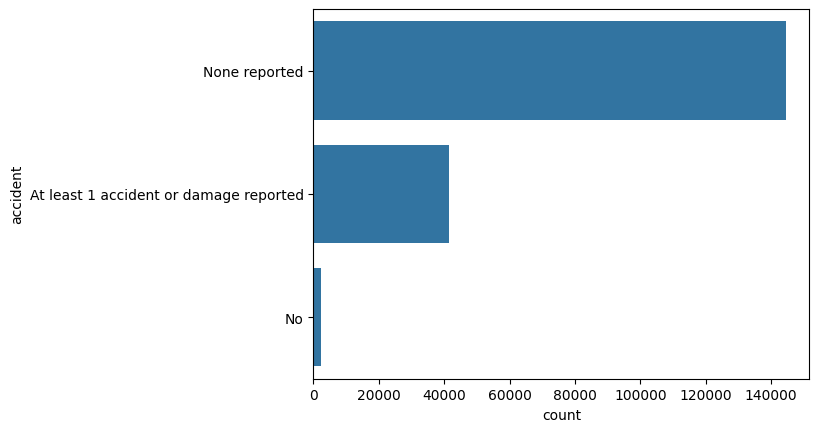

In [217]:
# value count for accident column: 

sns.countplot(y= data["accident"])

Since, `No` and `None reported` means the same thing, I will convert `No` to `None reported`.

In [218]:
data.replace(to_replace="No", value= "None reported", inplace= True)

<Axes: xlabel='count', ylabel='accident'>

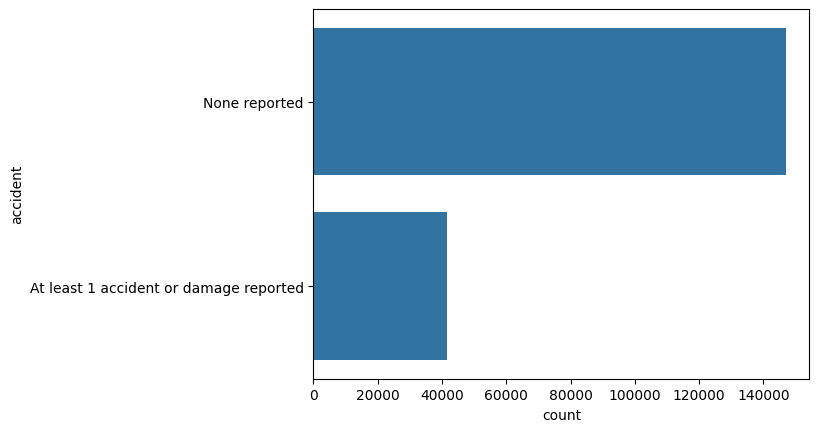

In [219]:
# value count for accident column when data is adjusted for None reported:
sns.countplot(y= data["accident"])

In [220]:
data["fuel_type"].value_counts()

fuel_type
Gasoline          165940
Hybrid              6832
E85 Flex Fuel       5406
Diesel              3955
–                    781
Plug-In Hybrid       521
not supported         15
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='fuel_type'>

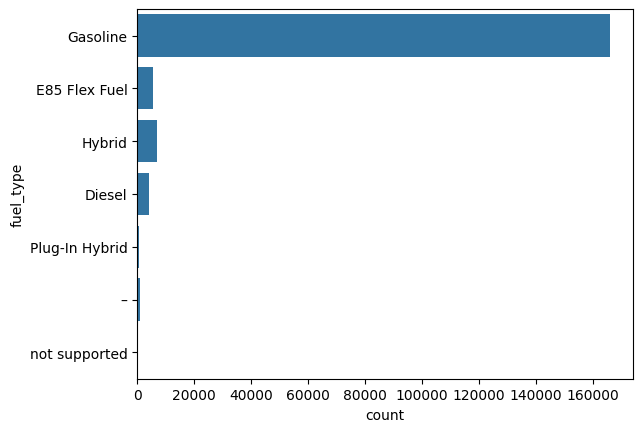

In [221]:
# Value count for Fuel type:
sns.countplot(y= data["fuel_type"])

`Gasoline` dominates the pot here. Most of the cars are running on gasoline.

-----

### 8. **Outlier Detection:**

In [222]:
data[["milage", "price"]].describe()

,milage,price
count,"188,533.00","188,533.00"
mean,"65,705.30","43,878.02"
std,"49,798.16","78,819.52"
min,100.00,"2,000.00"
25%,"24,115.00","17,000.00"
50%,"57,785.00","30,825.00"
75%,"95,400.00","49,900.00"
max,"405,000.00","2,954,083.00"


`Outliers` appear as individual points outside the `whiskers` of the boxplot.

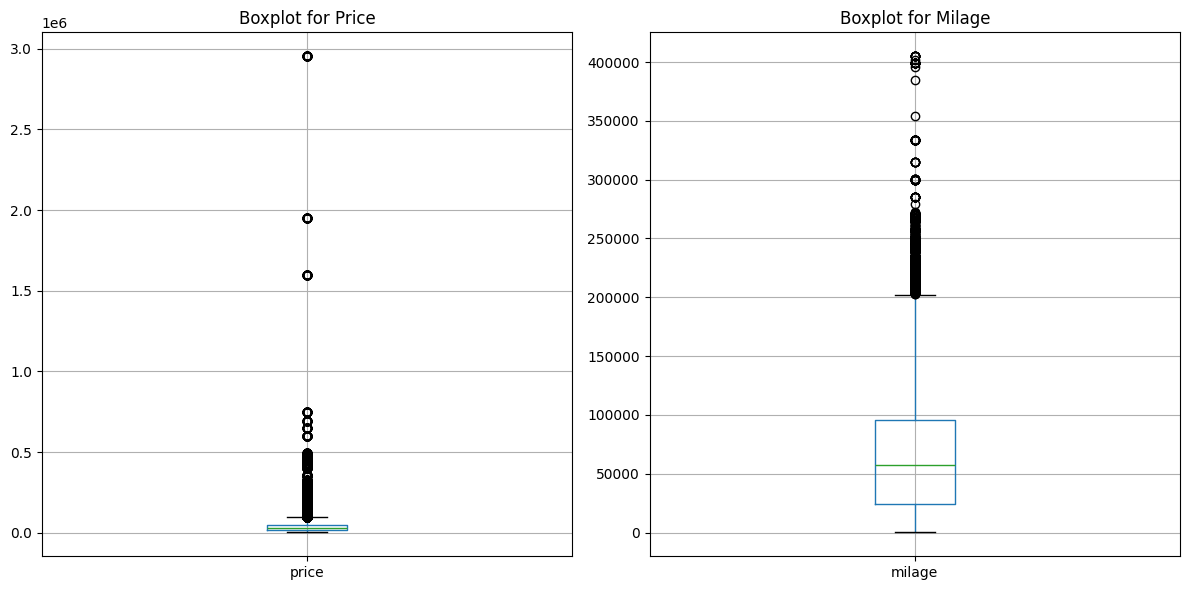

In [223]:
from matplotlib.ticker import ScalarFormatter
# 1. Outlier Detection using Boxplots
plt.figure(figsize=(12, 6))

# Boxplot for price
plt.subplot(1, 2, 1)
data.boxplot(column='price')
plt.title('Boxplot for Price')

# Boxplot for milage
plt.subplot(1, 2, 2)
data.boxplot(column='milage')
plt.title('Boxplot for Milage')

plt.tight_layout()
plt.show()

So, form these plots, we see that there are three cars having extremely high prices. also, the mean car price range is relatively small as compared to the milage range of the cars. The milage column contains relatively huge number of outliers compared to price.

`Z-scores` indicate how many standard deviations a data point is from the mean. Generally, **a `Z-score` greater than 3 or less than -3 is considered an outlier.**

In [224]:

# 2. Outlier Detection using Z-scores
from scipy.stats import zscore

# Calculate z-scores
data['price_z'] = zscore(data['price'])
data['milage_z'] = zscore(data['milage'])

# Define a threshold for identifying outliers
threshold = 3

# Identify outliers
price_outliers = data[(data['price_z'] > threshold) | (data['price_z'] < -threshold)]
milage_outliers = data[(data['milage_z'] > threshold) | (data['milage_z'] < -threshold)]

# Display the outliers
print("Outliers based on Price (Z-scores):")
print(price_outliers[['milage', 'price']])
print("-"*100)
print("\nOutliers based on Milage (Z-scores):")
print(milage_outliers[['milage', 'price']])

Outliers based on Price (Z-scores):
        milage    price
220      26315  2954083
267     127600   315000
296      44300   489000
350      67482   349950
433      25520   449995
...        ...      ...
187912   12771   469900
187915    6397   324995
188022   20069   359991
188192   87500   324995
188194   24915  1950995

[1315 rows x 2 columns]
----------------------------------------------------------------------------------------------------

Outliers based on Milage (Z-scores):
        milage  price
28      244200   3499
195     269885   7200
517     245000   5500
535     242000   6880
824     230000  16500
...        ...    ...
187591  239000   8000
187708  245000   7999
188047  249083  19000
188160  220000   6250
188523  239000   8000

[1200 rows x 2 columns]


----

## 9. **Minimum and Maximum Prices:**

In [225]:
minimum_price= data["price"].min()
minimum_price

np.int64(2000)

In [226]:
# show how many cars have minimum price: 2000: 
data[data["price"]== 2000].shape[0]

56

In [227]:
data.columns

Index(['id', 'brand', 'model', 'model_year', 'milage', 'fuel_type',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price', 'engine_power_hp', 'engine_volumn_liters', 'no_of_cylinders',
       'price_z', 'milage_z'],
      dtype='object')

So, there are 56 extreme cases where price is  very low `2000`. This is probably because these cars are very old, outdated, give very poor mileage and things like that.

In [228]:
max_price= data["price"].max()
max_price

np.int64(2954083)

In [229]:
# show how many cars have minimum price:
print(data[data["price"]== max_price].shape[0])

50


There are 50 extreme cases where the price is extreme for the whole dataset: `2954083`. These cars are probably luxerious or sports cars having advanced technologies intregrated into them.

In [230]:
mean_price= data["price"].mean()
mean_price

np.float64(43878.01617753921)

In [231]:
max_price- minimum_price

np.int64(2952083)

This shows that the range for minimum and maximum price is extremely large indicating high variability of the cars price. And, Comparatively, mean price is closer to the minimum price, the distribution of price is highly right skewed.

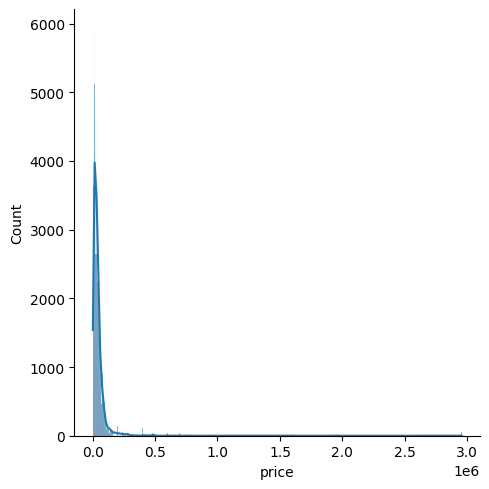

In [232]:
sns.displot(x= data["price"], kde=True)

So those three outliers significently affects the distribution. As, there cars having such three extreme values, we can not drop such data entries. Again, they are not many if compared to the size of our dataset. 

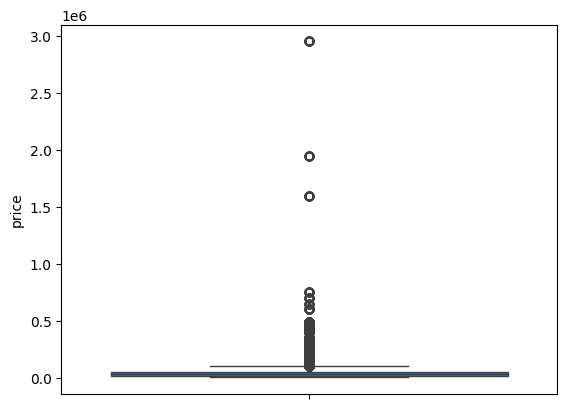

In [233]:
# Box plot to show the distribution of price:
sns.boxplot(data= data, y= 'price')
plt.show()

<Axes: ylabel='price'>

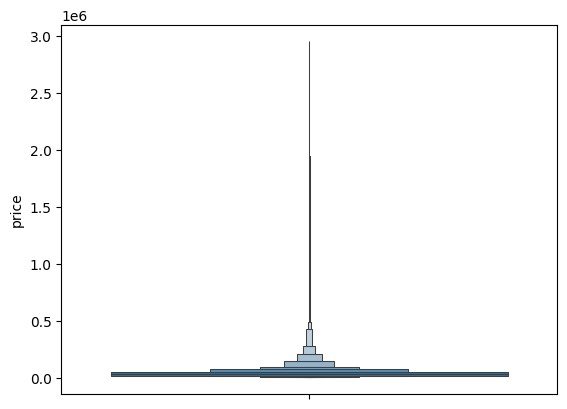

In [234]:
# The boxen plot:
sns.boxenplot(data= data, y= 'price')

----
----

### 10. **Year Range of Cars:**

In [235]:
data.columns

Index(['id', 'brand', 'model', 'model_year', 'milage', 'fuel_type',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price', 'engine_power_hp', 'engine_volumn_liters', 'no_of_cylinders',
       'price_z', 'milage_z'],
      dtype='object')

We are going to work with `model_year`.

In [236]:
data["model_year"].dtypes

dtype('int64')

In [237]:
# Get the oldest and newest model years
oldest_year = data['model_year'].min()
newest_year = data['model_year'].max()

# Calculate the age of the oldest car
current_year = 2025  
oldest_car_age = current_year - oldest_year

# Display the results
print(f"The oldest car model year is: {oldest_year} (Age: {oldest_car_age} years)")
print(f"The newest car model year is: {newest_year}")

The oldest car model year is: 1974 (Age: 51 years)
The newest car model year is: 2024


Number of cars based on the `model_year`:

In [238]:
new= data.groupby(by= "model_year")["id"].count()

In [239]:
new

model_year
1974       12
1992       14
1993      140
1994       92
1995      102
1996      189
1997      312
1998      343
1999      554
2000      558
2001     1534
2002     1282
2003     1906
2004     2570
2005     3129
2006     2814
2007     4876
2008     5156
2009     2716
2010     4235
2011     6265
2012     6095
2013     6796
2014     8415
2015    11389
2016    13696
2017    12794
2018    16414
2019    15409
2020    15848
2021    18198
2022    15749
2023     8769
2024      162
Name: id, dtype: int64

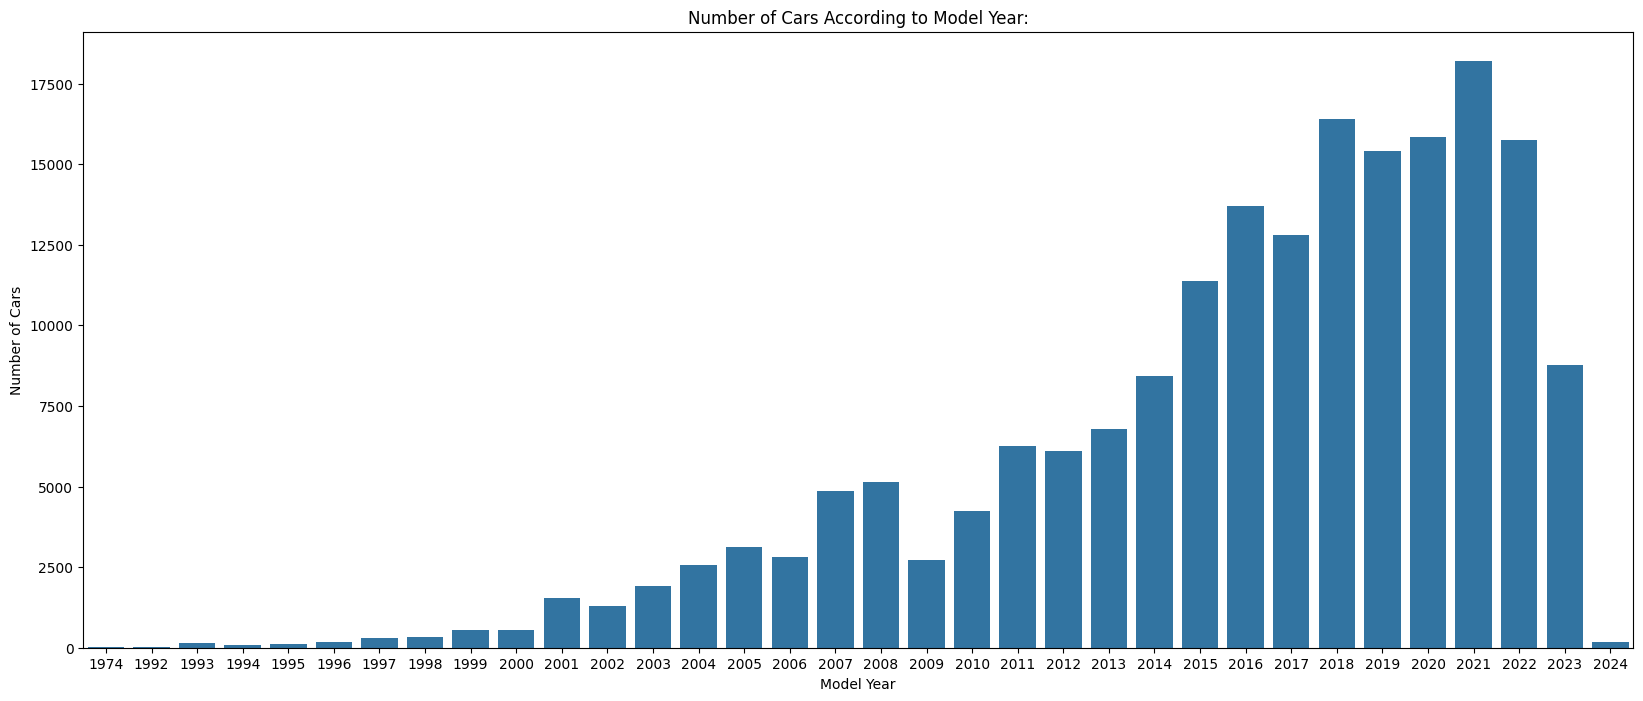

In [240]:
plt.figure(figsize=(20,8))
sns.barplot(x= new.index, y= new.values )
plt.title('Number of Cars According to Model Year:')
# Model Year means particular year when the car was built
plt.xlabel('Model Year')
plt.ylabel("Number of Cars")
plt.show()

----

### 11. **Distribution of Engine Sizes:**

In [241]:
data.columns

Index(['id', 'brand', 'model', 'model_year', 'milage', 'fuel_type',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price', 'engine_power_hp', 'engine_volumn_liters', 'no_of_cylinders',
       'price_z', 'milage_z'],
      dtype='object')

In [242]:
data[["engine_power_hp", "engine_volumn_liters","no_of_cylinders"]].dtypes

engine_power_hp         object
engine_volumn_liters    object
no_of_cylinders         object
dtype: object

In [243]:
data[["engine_power_hp", "engine_volumn_liters", "no_of_cylinders"]]

,engine_power_hp,engine_volumn_liters,no_of_cylinders
0,172.0,1.6,4
1,252.0,3.9,8
2,320.0,5.3,8
3,420.0,5.0,8
4,208.0,2.0,4
...,...,...,...
188528,420.0,6.2,8
188529,385.0,3.0,V6
188530,469.0,4.0,8
188531,3.0L,,NaN


In [244]:
data["no_of_cylinders"].unique()

array([' 4 ', ' 8 ', ' V6 ', nan, ' Straight 6', ' 10 ', ' Flat 6',
       'iter DOHC Turbo', ' 12 ', 'iter', 'iter Turbo', 'iter TFSI',
       ' 5 ', 'iter DOHC', ' Rotary engine', 'iter SIDI DOHC',
       'iter Twin Turbo', 'iter DOHC Twin', ' 3 ', 'iter SOHC',
       ' Electric Motor', 'iter GTDI', 'iter SC DOHC', 'iter SC U',
       'iter Supercharged', 'iter TSI', 'iter DOHC T/C', 'iter GDI DOHC'],
      dtype=object)

----

### 12. **Average Price by Brand:**

In [245]:
data.columns

Index(['id', 'brand', 'model', 'model_year', 'milage', 'fuel_type',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price', 'engine_power_hp', 'engine_volumn_liters', 'no_of_cylinders',
       'price_z', 'milage_z'],
      dtype='object')

In [246]:
data["brand"].nunique()

57

In [247]:
average_price_per_each_brand= data.groupby(by= 'brand')["price"].mean()

In [248]:
average_price_per_each_brand

brand
Acura            28,628.50
Alfa             51,993.10
Aston           112,364.59
Audi             41,004.86
BMW              43,659.78
Bentley         129,272.93
Bugatti         169,600.00
Buick            29,617.84
Cadillac         45,659.09
Chevrolet        41,836.76
Chrysler         27,010.73
Dodge            33,277.54
FIAT             31,045.89
Ferrari         116,751.01
Ford             40,511.97
GMC              38,936.16
Genesis          53,556.33
Honda            22,800.97
Hummer           15,355.61
Hyundai          25,936.51
INFINITI         33,371.68
Jaguar           48,147.54
Jeep             34,116.92
Karma            37,384.18
Kia              38,072.47
Lamborghini     159,176.01
Land             53,204.88
Lexus            34,801.09
Lincoln          30,712.60
Lotus            26,436.48
Lucid            63,310.36
MINI             17,162.02
Maserati         61,459.70
Maybach          53,566.33
Mazda            25,332.83
McLaren         123,261.24
Mercedes-Benz    51,24

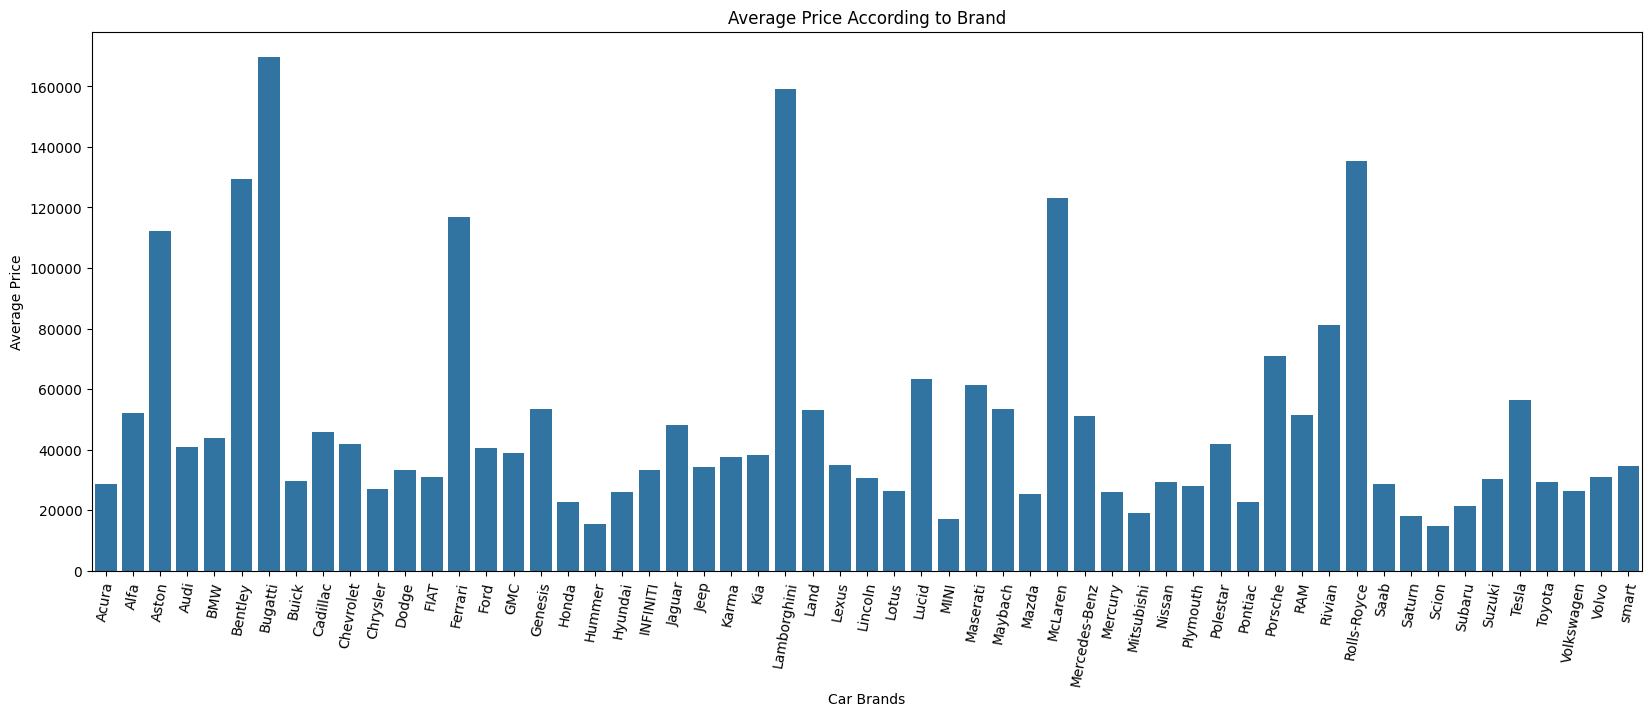

In [249]:
plt.figure(figsize=(20, 7))
sns.barplot(y= average_price_per_each_brand.values, x= average_price_per_each_brand.index)
plt.xticks(rotation= 80)
plt.xlabel("Car Brands")
plt.ylabel("Average Price")
plt.title("Average Price According to Brand")
plt.show()

-----

### 13. **Price vs. Model Year:**

In [250]:
data.columns

Index(['id', 'brand', 'model', 'model_year', 'milage', 'fuel_type',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price', 'engine_power_hp', 'engine_volumn_liters', 'no_of_cylinders',
       'price_z', 'milage_z'],
      dtype='object')

The model year should significiently affect the car price.

In [251]:
data["model_year"].nunique()

34

In [252]:
price_vs_model_year= data.groupby(by= 'model_year')["price"].mean()

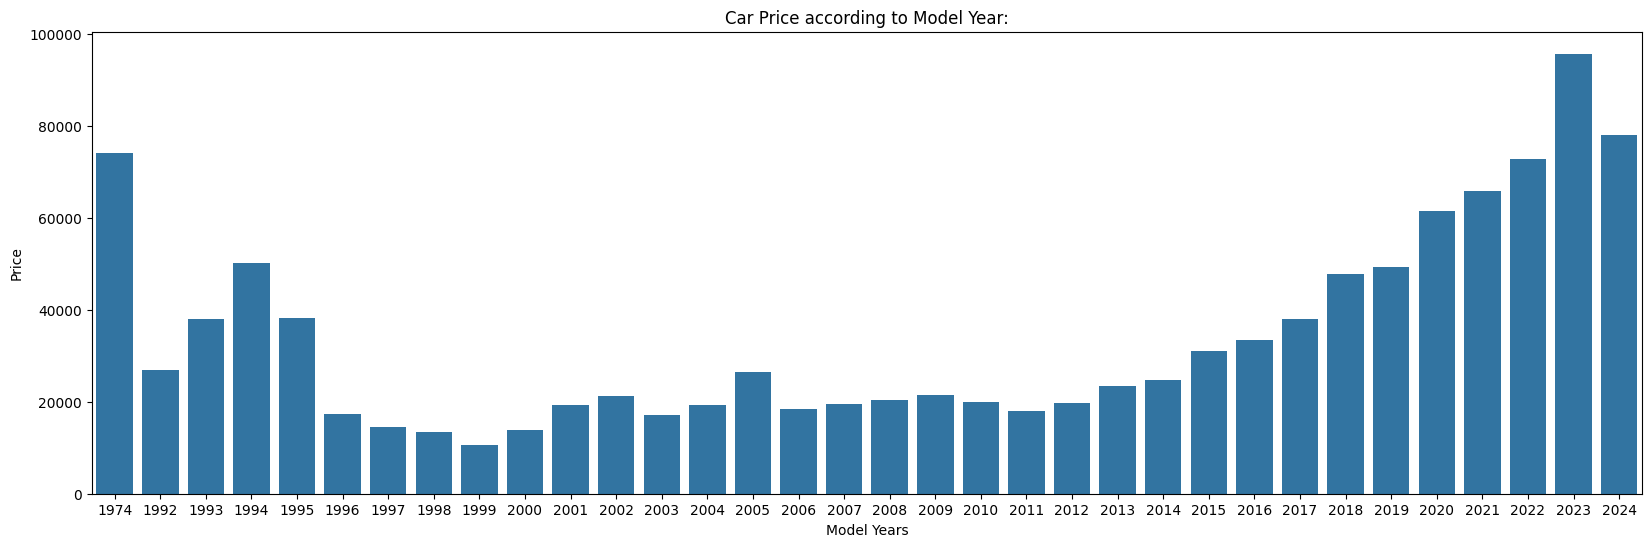

In [253]:
plt.figure(figsize=(20, 6))
sns.barplot(y= price_vs_model_year.values, x= price_vs_model_year.index)
plt.xlabel("Model Years")
plt.ylabel("Price")
plt.title("Car Price according to Model Year:")
plt.show()

So, this plt indicates the recent model cars have higher average price which is obvious. Also there is high price region for very ancent cars particularly from 1974, 192, 1993, 1994 and 1995. This is probabiliy due to the fact that these cars are rare and have high demand.

Except for very ancent `model_year` cars like `1974`, `1994`, there is depreciation in the value of cars with age.

-----

### 14. **Price Distribution:**

In [254]:
# Set the float format to display numbers normally without scientific notation
pd.options.display.float_format = '{:,.2f}'.format

In [255]:
data["price"].describe()

count     188,533.00
mean       43,878.02
std        78,819.52
min         2,000.00
25%        17,000.00
50%        30,825.00
75%        49,900.00
max     2,954,083.00
Name: price, dtype: float64

1. **Mean (Average)**: 
   - This is the average of all the values in the dataset. It indicates that, on average, the values in the dataset are approximately **$43,878.02**. However, due to the presence of higher values (as indicated by the max), the mean may be skewed.

2. **Standard Deviation (std)**:
   - This measures the amount of variation or dispersion in the dataset. A standard deviation of **$78,819.52** indicates a high variability in the data, suggesting that the individual values are widely spread out from the mean. This suggests that while some values are near the mean, many others are much higher or lower.

3. **Minimum (min)**:
   - The smallest value in the dataset is **$2,000.00**. This reflects the lowest end of the spectrum for the values considered.

4. **25th Percentile (25%)**:
   - This value indicates that 25% of the values in the dataset are below **$17,000.00**. It gives insight into the lower portion of the dataset, suggesting that a significant portion of the values are relatively low compared to the mean.

5. **Median (50%)**:
   - The median represents the middle value where 50% of the values are below and 50% are above. A median of **$30,825.00** indicates that half of the values are less than this amount, suggesting that the dataset may have a right skew due to higher values (as seen by the mean being higher than the median).

6. **75th Percentile (75%)**:
   - This indicates that 75% of the values in the dataset are below **$49,900.00**. This is a significant indicator that highlights the upper range of the lower 75% of the dataset.

7. **Maximum (max)**:
   - The highest value in the dataset is **$2,954,083.00**. This exceptionally high value suggests the presence of some outliers or very high-end items in the data. It significantly impacts the mean and standard deviation.

Overall, the statistical summary indicates a dataset with a considerable range of values, characterized by a high mean and standard deviation. The presence of a low minimum (2,000) and a very high maximum (nearly 3 million) suggests the data is skewed to the right, with most values clustering at the lower end while a few exceptionally high values pull the mean upward. The median being lower than the mean further supports this observation, indicating that many data points are significantly above the central tendency.

In [256]:
# Set the float format to display numbers normally without scientific notation
pd.options.display.float_format = '{:,.2f}'.format

<Axes: xlabel='price', ylabel='Count'>

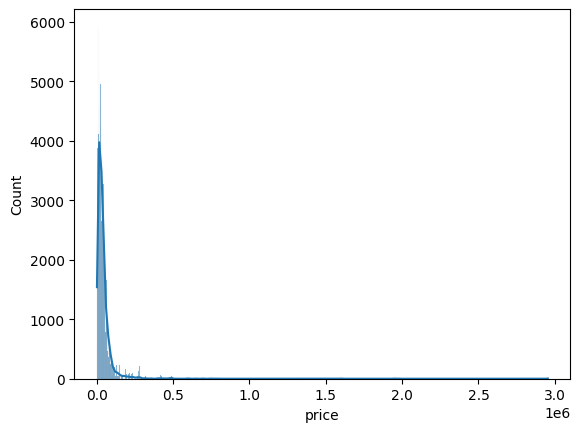

In [257]:
# The Distribution of Price is Right-skewed:
sns.histplot(data= data, x="price", kde=True)

So, the curve is extremely right-skewed. Dropping some extreme values will be good for further analysis.

----

### 15. **Compare Price by Transmission Type:**

1. Analyze if automatic cars are more expensive than manual ones:

In [258]:
data.columns

Index(['id', 'brand', 'model', 'model_year', 'milage', 'fuel_type',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price', 'engine_power_hp', 'engine_volumn_liters', 'no_of_cylinders',
       'price_z', 'milage_z'],
      dtype='object')

In [259]:
data["transmission"].unique()

array(['A/T', 'Transmission w/Dual Shift Mode', '7-Speed A/T',
       '8-Speed A/T', '10-Speed Automatic', '1-Speed A/T', '6-Speed A/T',
       '10-Speed A/T', '9-Speed A/T', '8-Speed Automatic',
       '9-Speed Automatic', '5-Speed A/T', 'Automatic',
       '7-Speed Automatic with Auto-Shift', 'CVT Transmission',
       '5-Speed M/T', 'M/T', '6-Speed M/T', '6-Speed Automatic',
       '4-Speed Automatic', '7-Speed M/T', '2-Speed A/T',
       '1-Speed Automatic', 'Automatic CVT', '4-Speed A/T',
       '6-Speed Manual', 'Transmission Overdrive Switch',
       '8-Speed Automatic with Auto-Shift', '7-Speed Manual',
       '7-Speed Automatic', '9-Speed Automatic with Auto-Shift',
       '6-Speed Automatic with Auto-Shift',
       '6-Speed Electronically Controlled Automatic with O', 'F', 'CVT-F',
       '8-Speed Manual', 'Manual', '–', '2', '6 Speed At/Mt',
       '5-Speed Automatic', '2-Speed Automatic', '8-SPEED A/T', '7-Speed',
       'Variable', 'Single-Speed Fixed Gear', '8-SPEED AT',


In [260]:
price_by_trans= data.groupby(by= "transmission")["price"].mean()

In [261]:
price_by_trans

transmission
1-Speed A/T                                           57,869.53
1-Speed Automatic                                     69,596.76
10-Speed A/T                                          58,806.71
10-Speed Automatic                                    63,990.06
10-Speed Automatic with Overdrive                     68,067.25
2                                                     52,283.84
2-Speed A/T                                           56,949.56
2-Speed Automatic                                     77,319.55
4-Speed A/T                                           16,939.92
4-Speed Automatic                                     89,443.29
5-Speed A/T                                           21,194.61
5-Speed Automatic                                     50,542.68
5-Speed M/T                                           16,330.05
6 Speed At/Mt                                         34,512.05
6 Speed Mt                                            35,722.27
6-Speed                    

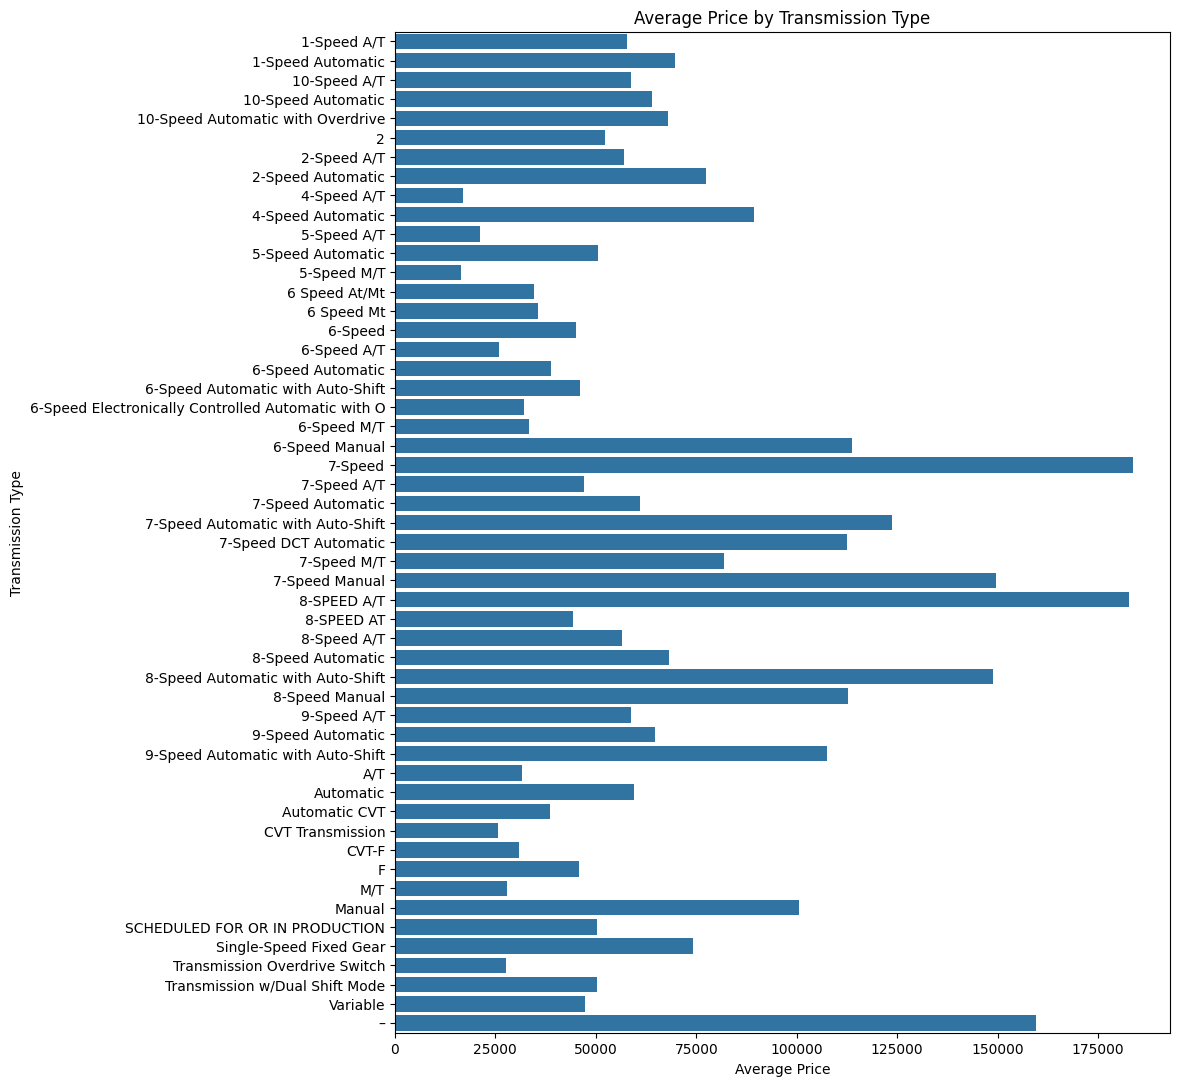

In [262]:
plt.figure(figsize=(10, 13))
sns.barplot(x= price_by_trans.values, y= price_by_trans.index)
plt.xlabel("Average Price")
plt.ylabel("Transmission Type")
plt.title("Average Price by Transmission Type")
plt.show()

1. **High-End Automatic Transmissions**:
   - **7-Speed A/T (183,672.59)** and **8-SPEED A/T (182,691.00)** are the highest-priced transmission types, suggesting that vehicles equipped with these advanced automatic transmissions are generally positioned as luxury or high-performance cars. This aligns with consumer expectations, where more gears typically indicate advanced engineering and better performance.

2. **Manual Transmissions**:
   - **6-Speed Manual (113,867.30)** and **7-Speed Manual (149,622.67)** also command considerable prices, indicating a niche market where vehicles with manual transmissions appeal to enthusiasts or performance-driven consumers. This might be due to their perceived engagement and driving experience.

3. **Standard Automatic Transmissions**:
   - **Standard Automatic options like 1-Speed Automatic (69,596.76)** and **10-Speed Automatic (63,990.06)** show significant price points, reflecting the industry's trend toward automatics being seen as standard for reliability and ease of use.

4. **Variable and CVT Transmissions**:
   - Lower average prices for **CVT (25,586.60)** and **CVT-F (30,936.53)** suggest that these transmissions are typically found in economy or budget-friendly models. Consumers often expect lower costs for vehicles with continuously variable transmissions due to their common use in lower-priced segments.

5. **Inconsistencies and Variability**:
   - The presence of a wide range of prices—from as low as **16,939.92** for **4-Speed A/T** to **2,954,083.00** for certain undefined or poorer value transmissions—indicates significant variability in this dataset. Some transmissions (like **4-Speed A/T**) may be outdated or used in budget-friendly cars, while the exceedingly high max value could point toward high-end models or vehicles listed at higher than average prices due to special features or market factors.

Overall, the transmission type significantly influences car pricing. Advanced automatic and manual transmissions typically correlate with higher prices, reflecting advancements in technology and performance. In contrast, more basic or older transmission types tend to be associated with lower price points, underscoring their appeal in the economy car segment. 

----

### 16. **Price vs. Milage:**

Identify correlation between usage and car value:

In [263]:
data.columns

Index(['id', 'brand', 'model', 'model_year', 'milage', 'fuel_type',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price', 'engine_power_hp', 'engine_volumn_liters', 'no_of_cylinders',
       'price_z', 'milage_z'],
      dtype='object')

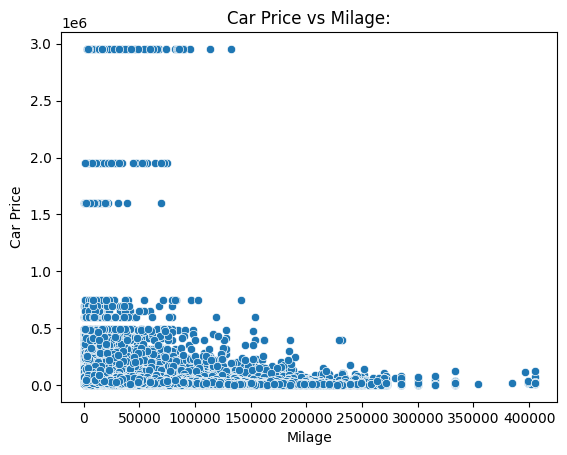

In [264]:
sns.scatterplot(data= data, x= "milage", y= "price")
plt.xlabel("Milage")
plt.ylabel("Car Price")
plt.title("Car Price vs Milage:")
plt.show()

We can see a general trend in above figure: approximately; as milage increases, the price decreases accordingly and this is a common case. With relatively low milage, some cars have signicantly high as clearly seen in the graph. 

----

### 17. **Price by Fuel Type:**

Which fuel types command higher average prices:

In [265]:
data.columns

Index(['id', 'brand', 'model', 'model_year', 'milage', 'fuel_type',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price', 'engine_power_hp', 'engine_volumn_liters', 'no_of_cylinders',
       'price_z', 'milage_z'],
      dtype='object')

In [266]:
data["fuel_type"].unique()

array(['Gasoline', 'E85 Flex Fuel', nan, 'Hybrid', 'Diesel',
       'Plug-In Hybrid', '–', 'not supported'], dtype=object)

In [267]:
pr_fuel_tp= data.groupby(by= "fuel_type")["price"].mean()

In [268]:
pr_fuel_tp

fuel_type
Diesel           48,769.59
E85 Flex Fuel    26,729.76
Gasoline         43,360.01
Hybrid           55,473.45
Plug-In Hybrid   44,150.97
not supported    20,692.73
–                36,414.29
Name: price, dtype: float64

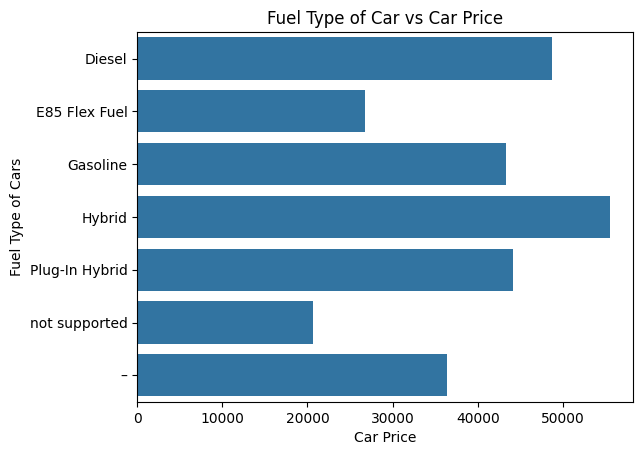

In [269]:
sns.barplot(y= pr_fuel_tp.index, x= pr_fuel_tp.values)
plt.xlabel("Car Price")
plt.ylabel("Fuel Type of Cars")
plt.title("Fuel Type of Car vs Car Price")
plt.show()

1. **Diesel**: `$48,769.50`: 
   - Diesel vehicles tend to be priced higher than average, reflecting their popularity for commercial and high-torque applications, as well as their perceived efficiency for long-distance driving.

2. **E85 Flex Fuel**: `$26,729.76`:
   - Cars that use E85 Flex Fuel are relatively low-priced compared to other fuel types. This suggests that vehicles designed for flex fuel might appeal to budget-conscious consumers or that they occupy a niche market.

3. **Gasoline**: `$43,360.01`:  
   - Gasoline vehicles represent a significant portion of the market and have a moderate average price. This aligns with their widespread availability and consumer familiarity, making them a popular choice for many buyers.

4. **Hybrid**: `$55,473.45`: 
   - Hybrids command the highest average price among the listed fuel types. Their appeal lies in their fuel efficiency and the growing trend toward eco-friendly vehicles. This price point indicates that hybrids are often positioned as premium options in the market.

5. **Plug-In Hybrid**:  `$44,150.97`:
   - Plug-in hybrids are priced slightly lower than traditional hybrids and indicate a growing interest in vehicles that offer both electric and gasoline capabilities. Their pricing reflects confidence in their advantages in efficiency and reduced emissions.

6. **Not Supported**: `$20,692.73`: 
   - Vehicles with the "not supported" designation have the lowest average price. This could indicate older models or vehicles that do not fit into standard fuel classifications, making them less desirable in the current market.

7. **Special Characters (–)**: `$36,414.29`: 
   - The presence of a generic placeholder suggests variability or data inconsistencies. The average price here is moderate but warrants further investigation to understand what types of vehicles this encompasses.

----

### 18. **Price vs. Engine Size:**

Find out if larger engines lead to higher prices.

In [270]:
data.columns

Index(['id', 'brand', 'model', 'model_year', 'milage', 'fuel_type',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price', 'engine_power_hp', 'engine_volumn_liters', 'no_of_cylinders',
       'price_z', 'milage_z'],
      dtype='object')

In [271]:
mean_price_ccording_to_engine_size= data.groupby(by= "no_of_cylinders")['price'].mean()

In [272]:
mean_price_ccording_to_engine_size

no_of_cylinders
 10                  61,702.60
 12                 101,165.03
 3                   40,959.69
 4                   25,358.66
 5                   18,251.24
 8                   46,087.75
 Electric Motor      20,265.25
 Flat 6              72,665.55
 Rotary engine       15,253.68
 Straight 6          44,140.24
 V6                  32,536.04
iter                 55,341.39
iter DOHC            53,269.22
iter DOHC T/C        46,764.25
iter DOHC Turbo      48,878.56
iter DOHC Twin       62,363.87
iter GDI DOHC        98,462.25
iter GTDI            49,740.87
iter SC DOHC        121,030.68
iter SC U            72,065.05
iter SIDI DOHC       41,972.62
iter SOHC            49,530.57
iter Supercharged    42,562.36
iter TFSI            52,614.80
iter TSI             50,603.11
iter Turbo           52,990.96
iter Twin Turbo      73,782.18
Name: price, dtype: float64

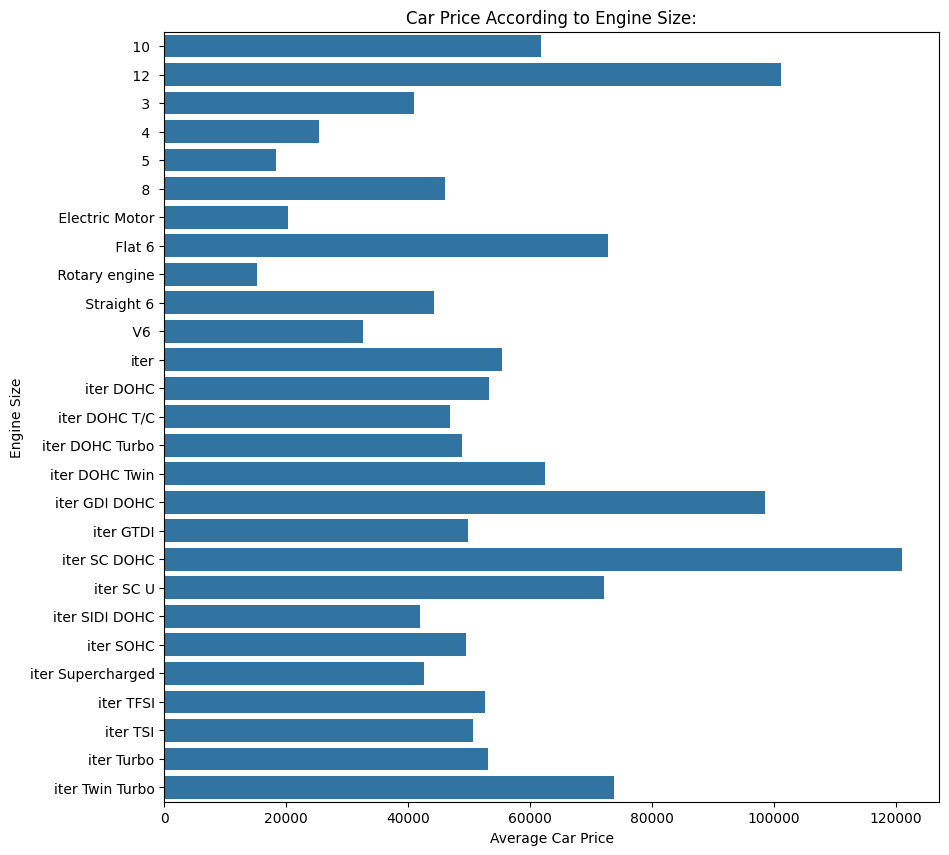

In [273]:
plt.figure(figsize=(10,10))
sns.barplot(x= mean_price_ccording_to_engine_size.values, y= mean_price_ccording_to_engine_size.index)
plt.xlabel("Average Car Price")
plt.ylabel("Engine Size")
plt.title("Car Price According to Engine Size:")
plt.show()


1. **High-Cylinder Engines**:
   - **12-Cylinder Engines**: Priced at **$101,165.03**, these are among the most expensive, indicating their use in luxury and high-performance vehicles where power and prestige are prioritized.
   - **10-Cylinder Engines**: Averaging **$61,702.60**, these engines also cater to high-performance markets, often found in sports cars and specialized vehicles.

2. **Mid-Range Cylinders**:
   - **Flat 6**: Priced at **$72,665.55**, this type indicates a premium pricing strategy, often associated with performance brands like Porsche.
   - **8-Cylinder Engines**: At **$46,087.75**, these engines balance power and efficiency, appealing to a broad market from trucks to sports cars.

3. **Lower-Cylinder Engines**:
   - **4-Cylinder Engines**: Averaging **$25,358.66**, these are typically found in economy vehicles, reflecting their cost-effective nature.
   - **3-Cylinder Engines**: Priced at **$40,959.69**, these engines are increasingly popular in compact cars, offering a balance of fuel efficiency and lower costs.

4. **Specialized Engine Types**:
   - **Electric Motor**: At **$20,265.25**, electric vehicles are currently the lowest priced in this dataset, possibly reflecting entry-level models in the market.
   - **Rotary Engine**: Averaging **$15,253.68**, indicates a niche market with specialized applications, typically associated with Mazda.

5. **Turbocharged and Supercharged Engines**:
   - **Supercharged Engines**: Priced at **$121,030.68**, indicating a premium segment where performance is a key selling point.
   - **Turbocharged Variants**: Prices range from **$46,764.25** to **$73,782.18**, showcasing how turbocharging enhances performance across various configurations.

6. **Iterative Engine Types**:
   - The presence of multiple "iter" types shows a varied market segment, with prices reflecting technological enhancements such as direct injection (GDI) and turbocharging.

Overall, the dataset reveals a clear correlation between the number of cylinders and the average price of vehicles. Higher-cylinder engines command premium prices due to their performance and luxury appeal, while lower-cylinder and specialized engines tend to be more affordable, catering to budget-conscious consumers. This analysis underscores the diverse automotive market, where engine configuration significantly influences pricing strategies.

----

### 19. **Price vs. Accident History:**

In [274]:
data["accident"].unique()

array(['None reported', 'At least 1 accident or damage reported'],
      dtype=object)

In [275]:
data.groupby(by= "accident")["price"].mean()

accident
At least 1 accident or damage reported   25,334.07
None reported                            49,122.88
Name: price, dtype: float64

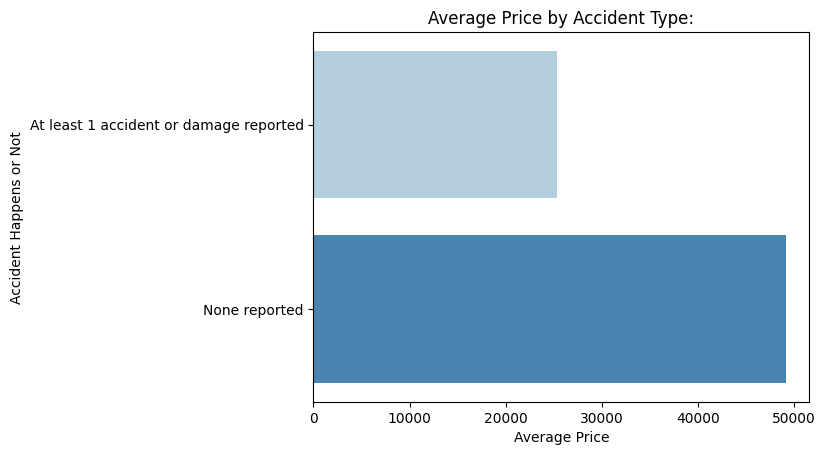

In [276]:
sns.barplot(y= data.groupby(by= "accident")["price"].mean().index, x= data.groupby(by= "accident")["price"].mean().values, palette= "Blues", hue= data.groupby(by= "accident")["price"].mean().index, legend= False)
plt.title('Average Price by Accident Type:')
plt.xlabel("Average Price")
plt.ylabel("Accident Happens or Not")
plt.show()

So, cars which have no accident history have almost double valuation compared to cars with at least one accident or damage accident history. This is a very important point to consider when buying a used cars.

---------

### 20. **Accident History vs. Engine Capacity:**

Here, we will check if `accident` is related to the `engine capacity` or the `engine efficiency`. The general understanding is that, accident might be high for high-end cars with high engine capacity or with more cylinders.

In [277]:
data.columns

Index(['id', 'brand', 'model', 'model_year', 'milage', 'fuel_type',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price', 'engine_power_hp', 'engine_volumn_liters', 'no_of_cylinders',
       'price_z', 'milage_z'],
      dtype='object')

In [278]:
acc_hist_engine_cap= data.groupby(by= "no_of_cylinders")["accident"].value_counts()

In [279]:
# Convert series to dataframe:
acc_hist_engine_cap= acc_hist_engine_cap.to_frame()

In [280]:
acc_hist_engine_cap.reset_index().shape

(50, 3)

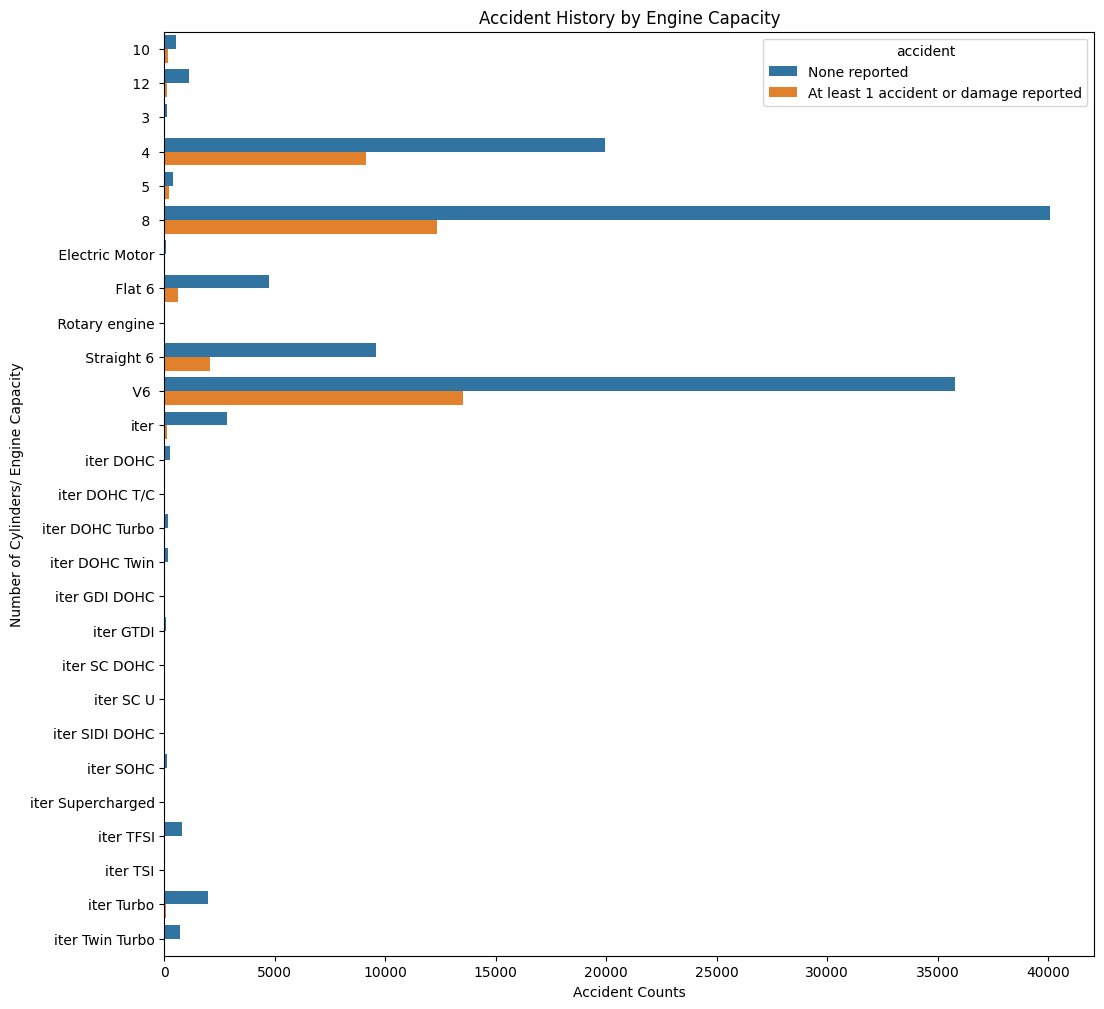

In [281]:
plt.figure(figsize=(12,12))
sns.barplot(data= acc_hist_engine_cap, y= "no_of_cylinders", x= "count", hue= "accident")
plt.title('Accident History by Engine Capacity')
plt.xlabel("Accident Counts")
plt.ylabel("Number of Cylinders/ Engine Capacity")
plt.show()

Here, we reported significant recordings for three engine capacities: `V6`, `8- cylinders` and `4-cylinders`. So, anyone whe is willing to buy cars can benifit from this analysis as among those 50 engine capacities, three shows significant Accident records.

----

### 21. **Price Based on Clean Title:**

Here, we determine how much a `clean title` affects `price`.

In [282]:
data.columns

Index(['id', 'brand', 'model', 'model_year', 'milage', 'fuel_type',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price', 'engine_power_hp', 'engine_volumn_liters', 'no_of_cylinders',
       'price_z', 'milage_z'],
      dtype='object')

In [283]:
data["clean_title"].unique()

array(['Yes', 'None reported'], dtype=object)

Here, we consider `None Reported` as `No`.

In [284]:
tile_data= data.groupby(by= "clean_title")["price"].mean()

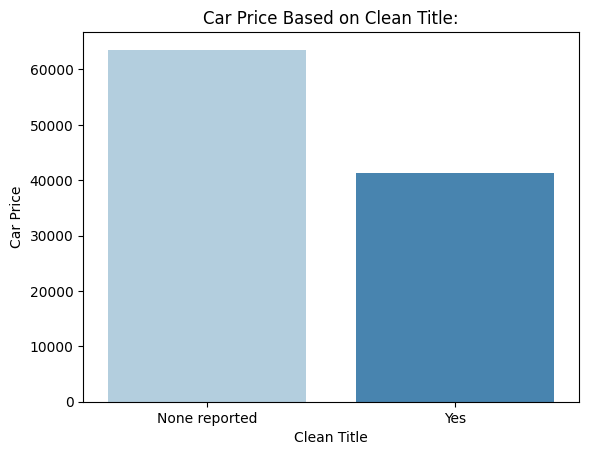

In [285]:
sns.barplot(x= tile_data.index, y= tile_data.values, palette="Blues", hue= tile_data.index, legend= False)
plt.title("Car Price Based on Clean Title:")
plt.xlabel("Clean Title")
plt.ylabel("Car Price")
plt.show()

If we consider `Not reported` as `No` then, `clean_title` does not influence the car price as in this case, `no clean title cars` are priced higher than those which `have a clean title`.

------

### **22. Top 10 Most Expensive Car Listings:**

Here, I will explore which car listings are `priced the highest` and `why`.

In [286]:
data.columns

Index(['id', 'brand', 'model', 'model_year', 'milage', 'fuel_type',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price', 'engine_power_hp', 'engine_volumn_liters', 'no_of_cylinders',
       'price_z', 'milage_z'],
      dtype='object')

In [287]:
top_10_most_exp_cares= data.groupby(by= "brand")["price"].max().head(10)

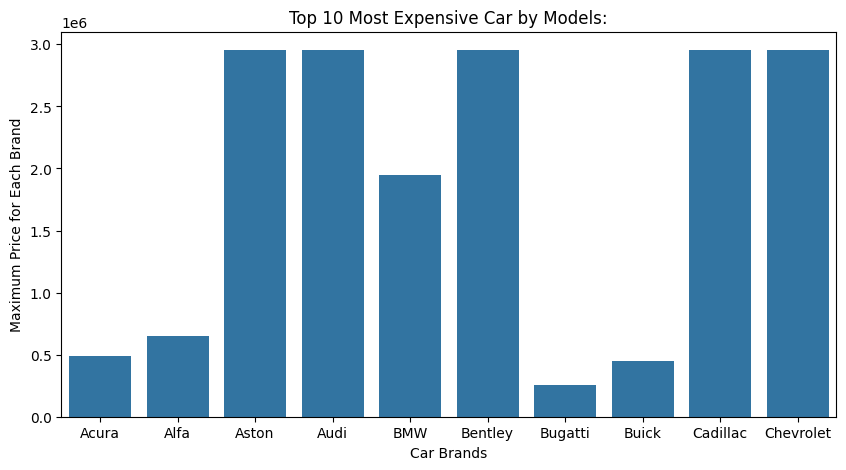

In [288]:
plt.figure(figsize=(10,5))
sns.barplot(x= top_10_most_exp_cares.index, y= top_10_most_exp_cares.values)
plt.title("Top 10 Most Expensive Car by Models:")
plt.xlabel("Car Brands")
plt.ylabel("Maximum Price for Each Brand")
plt.show()

-----

### 23. **Most Frequent Brands:**

Identify which brands are listed most often.

In [289]:
data.columns

Index(['id', 'brand', 'model', 'model_year', 'milage', 'fuel_type',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price', 'engine_power_hp', 'engine_volumn_liters', 'no_of_cylinders',
       'price_z', 'milage_z'],
      dtype='object')

In [290]:
data.shape

(188533, 17)

In [291]:
top_listed_brands= data["brand"].value_counts().head(10)

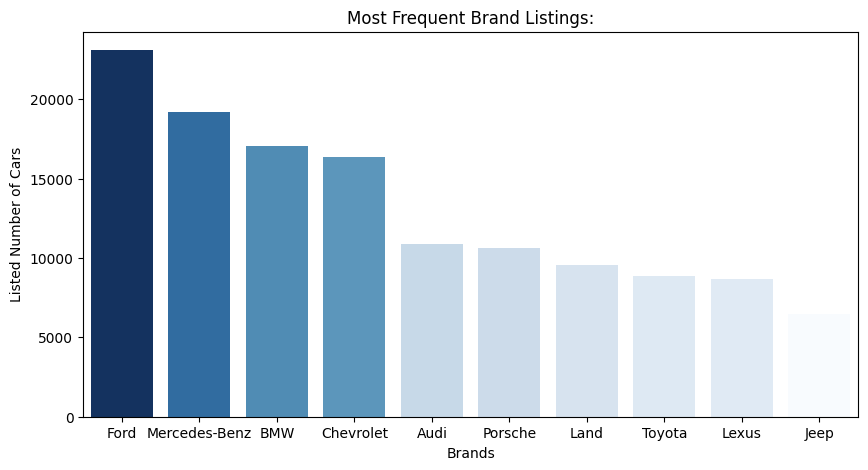

In [292]:
plt.figure(figsize=(10, 5))
sns.barplot(x= top_listed_brands.index, y= top_listed_brands.values, color='skyblue', palette= "Blues", hue= top_listed_brands.values, legend= False)
plt.title("Most Frequent Brand Listings:")
plt.ylabel("Listed Number of Cars")
plt.xlabel("Brands")
plt.show()

So, `Ford` is listed the most followed by `Mercedes-Benz`, `BMW` and, `Chevrolet`.

-----

### 24. **Most Common Models:**

In [293]:
data.columns

Index(['id', 'brand', 'model', 'model_year', 'milage', 'fuel_type',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price', 'engine_power_hp', 'engine_volumn_liters', 'no_of_cylinders',
       'price_z', 'milage_z'],
      dtype='object')

In [294]:
data["model"].head(10)

0         Cooper S Base
1                 LS V8
2     Silverado 2500 LT
3      G90 5.0 Ultimate
4           Metris Base
5         A6 2.0T Sport
6             A8 L 3.0T
7    Silverado 1500 1LZ
8             F-150 XLT
9               M4 Base
Name: model, dtype: object

In [295]:
data["model"].dtypes

dtype('O')

In [296]:
data["model"].nunique()

1897

In [297]:
# Top 20 listed brands:
top_20_brands= data["model"].value_counts().head(20)

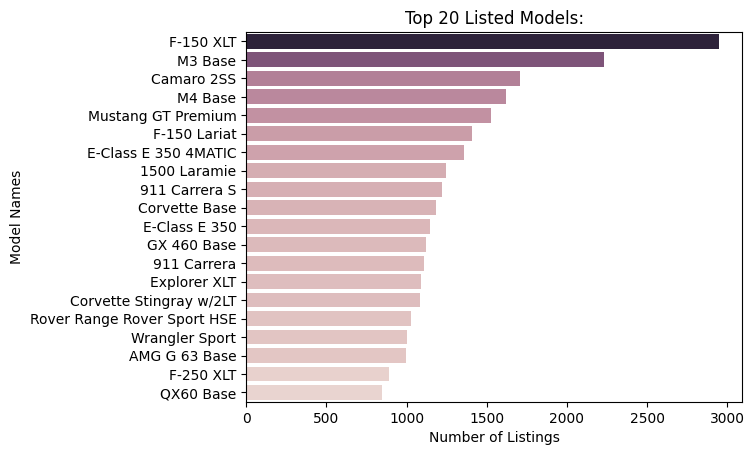

In [298]:
sns.barplot(x= top_20_brands.values, y= top_20_brands.index, hue= top_20_brands.values, legend= False)
plt.title('Top 20 Listed Models:')
plt.xlabel("Number of Listings")
plt.ylabel("Model Names")
plt.show()

----

### 25. **Average Milage by Brand:**

In [299]:
data.columns

Index(['id', 'brand', 'model', 'model_year', 'milage', 'fuel_type',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price', 'engine_power_hp', 'engine_volumn_liters', 'no_of_cylinders',
       'price_z', 'milage_z'],
      dtype='object')

In [300]:
data[["brand", "milage"]].dtypes

brand     object
milage     int64
dtype: object

In [301]:
avg_milage_by_brand= data.groupby(by= "brand")["milage"].mean()

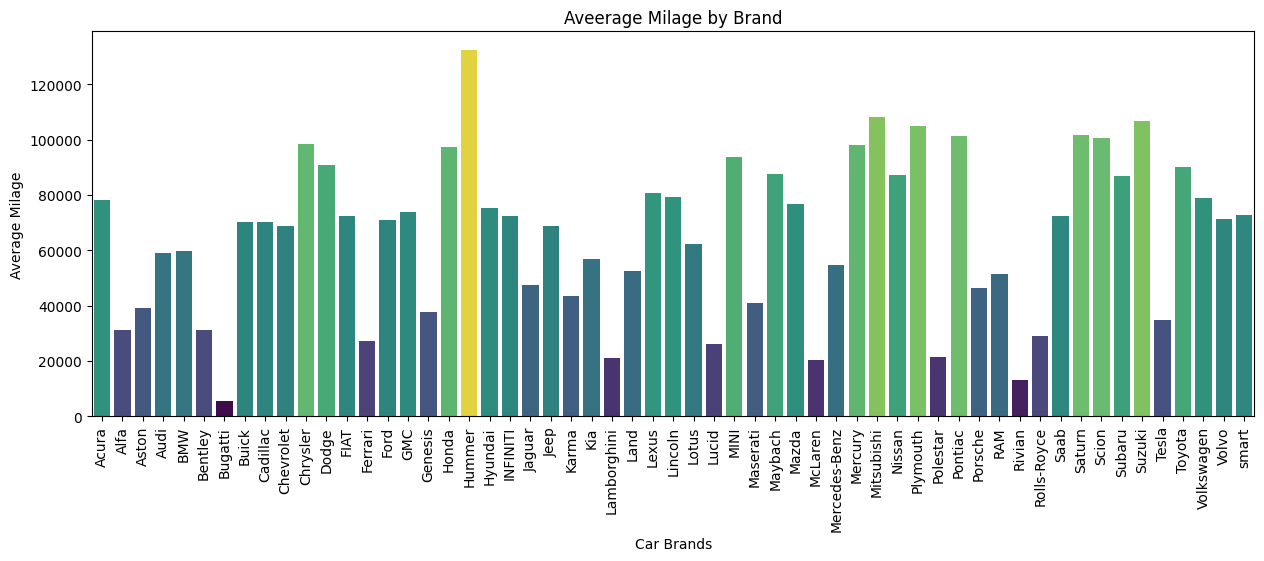

In [302]:
plt.figure(figsize=(15, 5))
sns.barplot(x= avg_milage_by_brand.index, y= avg_milage_by_brand.values, hue=avg_milage_by_brand.values, palette='viridis', legend= False)
plt.xticks(rotation= 90)
plt.title("Aveerage Milage by Brand")
plt.xlabel("Car Brands")
plt.ylabel("Average Milage")
plt.show()

Among all thr brands, `Hummer` stands out having maximum Milage. And `Bugati` is considered as having least milage among all the listed brands.

----

### 26. **Model Diversity per Brand:**

Here, I count how many different models exist under each brand.

In [303]:
data.columns

Index(['id', 'brand', 'model', 'model_year', 'milage', 'fuel_type',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price', 'engine_power_hp', 'engine_volumn_liters', 'no_of_cylinders',
       'price_z', 'milage_z'],
      dtype='object')

In [304]:
data["brand"].unique()

array(['MINI', 'Lincoln', 'Chevrolet', 'Genesis', 'Mercedes-Benz', 'Audi',
       'Ford', 'BMW', 'Tesla', 'Cadillac', 'Land', 'GMC', 'Toyota',
       'Hyundai', 'Volvo', 'Volkswagen', 'Buick', 'Rivian', 'RAM',
       'Hummer', 'Alfa', 'INFINITI', 'Jeep', 'Porsche', 'McLaren',
       'Honda', 'Lexus', 'Dodge', 'Nissan', 'Jaguar', 'Acura', 'Kia',
       'Mitsubishi', 'Rolls-Royce', 'Maserati', 'Pontiac', 'Saturn',
       'Bentley', 'Mazda', 'Subaru', 'Ferrari', 'Aston', 'Lamborghini',
       'Chrysler', 'Lucid', 'Lotus', 'Scion', 'smart', 'Karma',
       'Plymouth', 'Suzuki', 'FIAT', 'Saab', 'Bugatti', 'Mercury',
       'Polestar', 'Maybach'], dtype=object)

So, these are the different Brands present in our dataset.

In [305]:
data["model"].head()

0        Cooper S Base
1                LS V8
2    Silverado 2500 LT
3     G90 5.0 Ultimate
4          Metris Base
Name: model, dtype: object

In the following block of code, I group by car brands ie. I create different groups for each brand. Then, I only select the `model` column for each group. Then, I count for unique values present in `model` column for each group.

In [306]:
model_div_per_brand= data.groupby(by= "brand")["model"].nunique()

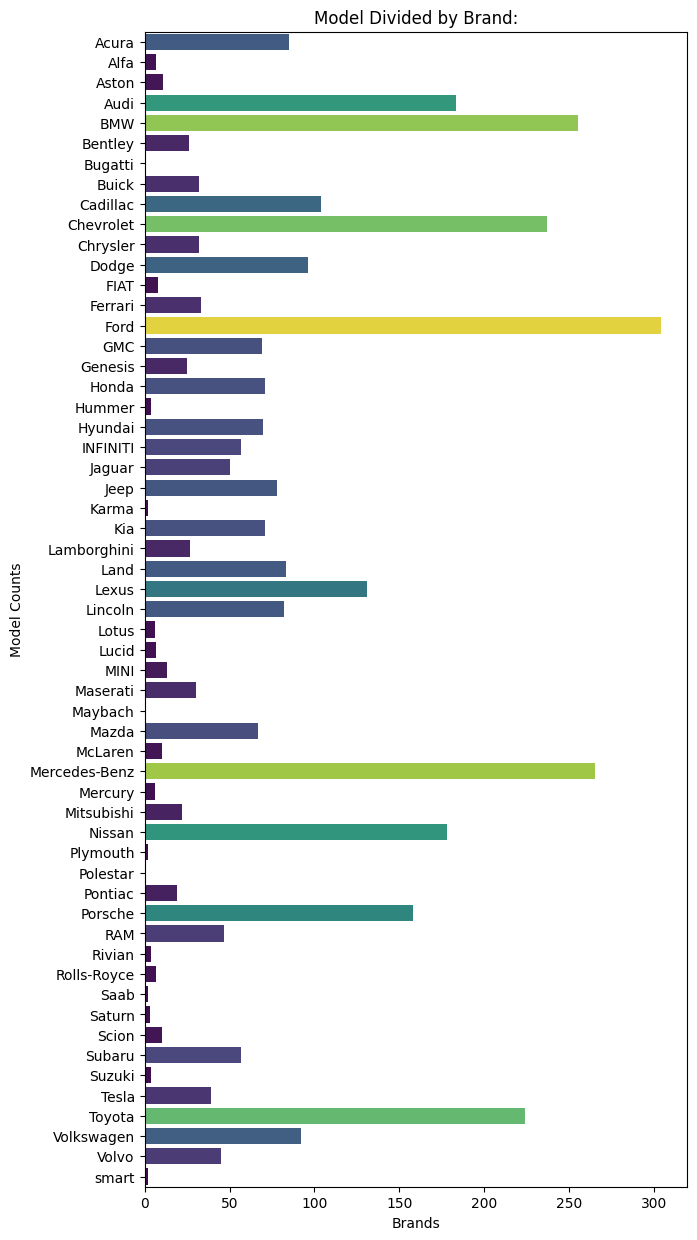

In [307]:
plt.figure(figsize=(7, 15))
sns.barplot(y= model_div_per_brand.index, x= model_div_per_brand.values, hue= model_div_per_brand.values, palette='viridis', legend= False)
plt.title('Model Divided by Brand:')
plt.xlabel("Brands")
plt.ylabel("Model Counts")
plt.show()

Ford has the most number of models available followed by `BMW`, `Mercedes`, `Nissan`. `Polestar`, `Bugatti`, `Maybach` seems to have very few models available.

------


### 27. **Brand vs. Fuel Type Usage:**

See which brands offer which types of fuel systems.

In [308]:
data.columns

Index(['id', 'brand', 'model', 'model_year', 'milage', 'fuel_type',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price', 'engine_power_hp', 'engine_volumn_liters', 'no_of_cylinders',
       'price_z', 'milage_z'],
      dtype='object')

In [309]:
data["fuel_type"].value_counts()

fuel_type
Gasoline          165940
Hybrid              6832
E85 Flex Fuel       5406
Diesel              3955
–                    781
Plug-In Hybrid       521
not supported         15
Name: count, dtype: int64

In [310]:
data["brand"].unique()

array(['MINI', 'Lincoln', 'Chevrolet', 'Genesis', 'Mercedes-Benz', 'Audi',
       'Ford', 'BMW', 'Tesla', 'Cadillac', 'Land', 'GMC', 'Toyota',
       'Hyundai', 'Volvo', 'Volkswagen', 'Buick', 'Rivian', 'RAM',
       'Hummer', 'Alfa', 'INFINITI', 'Jeep', 'Porsche', 'McLaren',
       'Honda', 'Lexus', 'Dodge', 'Nissan', 'Jaguar', 'Acura', 'Kia',
       'Mitsubishi', 'Rolls-Royce', 'Maserati', 'Pontiac', 'Saturn',
       'Bentley', 'Mazda', 'Subaru', 'Ferrari', 'Aston', 'Lamborghini',
       'Chrysler', 'Lucid', 'Lotus', 'Scion', 'smart', 'Karma',
       'Plymouth', 'Suzuki', 'FIAT', 'Saab', 'Bugatti', 'Mercury',
       'Polestar', 'Maybach'], dtype=object)

The following code block will first group our dataset according to different `brands`. Then for each brand, it selects the `fuel_type` column and then `counts` for the values for each `fuel_type`.

In [311]:
df= data.groupby(by= "brand")["fuel_type"].value_counts()
df

brand  fuel_type     
Acura  Gasoline          2216
       Hybrid              32
       –                   15
       E85 Flex Fuel       11
Alfa   Gasoline           681
                         ... 
Volvo  Plug-In Hybrid      67
       Hybrid              17
       –                    8
       Diesel               2
smart  Gasoline             2
Name: count, Length: 217, dtype: int64

In [312]:
df= df.reset_index()

In [313]:
df

,brand,fuel_type,count
0,Acura,Gasoline,2216
1,Acura,Hybrid,32
2,Acura,–,15
3,Acura,E85 Flex Fuel,11
4,Alfa,Gasoline,681
...,...,...,...
212,Volvo,Plug-In Hybrid,67
213,Volvo,Hybrid,17
214,Volvo,–,8
215,Volvo,Diesel,2


In [314]:
import pandas as pd

# Function to create brand-fuel dictionary
def create_brand_fuel_dict(df):
    brand_fuel_dict = df.groupby('brand')['fuel_type'].apply(list).to_dict()
    return brand_fuel_dict

# Get the dictionary
result = create_brand_fuel_dict(df)
#print(result)

# Pretty print the dictionary
import pprint
pprint.pprint(result)

{'Acura': ['Gasoline', 'Hybrid', '–', 'E85 Flex Fuel'],
 'Alfa': ['Gasoline'],
 'Aston': ['Gasoline', '–', 'E85 Flex Fuel'],
 'Audi': ['Gasoline',
          'Hybrid',
          'E85 Flex Fuel',
          'Diesel',
          'Plug-In Hybrid',
          '–'],
 'BMW': ['Gasoline',
         'Hybrid',
         'Plug-In Hybrid',
         'Diesel',
         'E85 Flex Fuel',
         '–'],
 'Bentley': ['Gasoline', 'E85 Flex Fuel', 'Diesel', 'Hybrid', '–'],
 'Bugatti': ['Gasoline'],
 'Buick': ['Gasoline', 'E85 Flex Fuel', 'Hybrid', 'Diesel'],
 'Cadillac': ['Gasoline',
              'E85 Flex Fuel',
              'Diesel',
              '–',
              'Hybrid',
              'Plug-In Hybrid'],
 'Chevrolet': ['Gasoline',
               'E85 Flex Fuel',
               'Diesel',
               '–',
               'Hybrid',
               'not supported',
               'Plug-In Hybrid'],
 'Chrysler': ['Gasoline', 'E85 Flex Fuel', '–', 'Hybrid', 'Diesel'],
 'Dodge': ['Gasoline', '–', 'Diesel', '

-----

### 28. **Price Variation Within a Brand:**

Use boxplots to show the price spread within top car brands.

In [315]:
data.columns

Index(['id', 'brand', 'model', 'model_year', 'milage', 'fuel_type',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price', 'engine_power_hp', 'engine_volumn_liters', 'no_of_cylinders',
       'price_z', 'milage_z'],
      dtype='object')

First, figure out top car brands:

In [316]:
idx= data.groupby(by= "brand")["price"].max().sort_values(ascending=False).head(10).index

In [317]:
idx

Index(['Aston', 'Cadillac', 'Audi', 'Bentley', 'GMC', 'Ford', 'Dodge',
       'Chrysler', 'Chevrolet', 'Hyundai'],
      dtype='object', name='brand')

These are the top 10 Car Brands according to their price.

In [318]:
aston_dataset= data[data["brand"]== "Aston"]

In [319]:
aston_dataset.head(1)

,id,brand,model,model_year,milage,fuel_type,transmission,ext_col,int_col,accident,clean_title,price,engine_power_hp,engine_volumn_liters,no_of_cylinders,price_z,milage_z
267,267,Aston,Martin Vantage GT Base,2017,127600,Gasoline,8-Speed A/T,Black,Black,None reported,Yes,315000,430.0,4.7,8,3.44,1.24


In [320]:
print(aston_dataset.shape) # Total listing of Aston cars: shape[0]
print(aston_dataset.shape[0]) # Total listing of Aston cars: 1

(238, 17)
238


AttributeError: This method only works with the ScalarFormatter

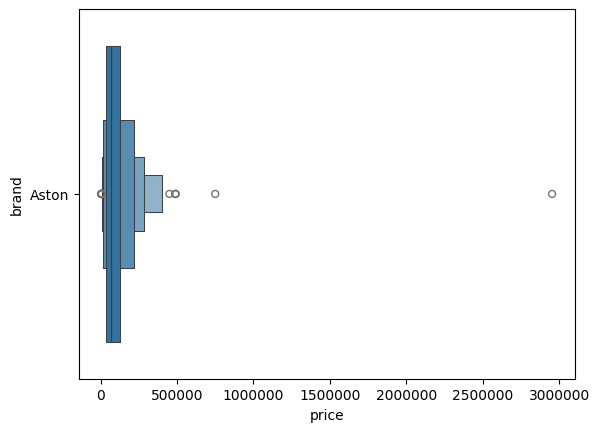

In [321]:
sns.boxenplot(x= "price", data = aston_dataset, y= "brand")
plt.ticklabel_format(style= "plain")

In [ ]:
Cadillac_data= data[data["brand"]== 'Cadillac']

In [ ]:
Cadillac_data.shape

(4674, 17)

In [ ]:
Cadillac_data.head(2)

,id,brand,model,model_year,milage,fuel_type,transmission,ext_col,int_col,accident,clean_title,price,engine_power_hp,engine_volumn_liters,no_of_cylinders,price_z,milage_z
12,12,Cadillac,Escalade ESV Platinum,2017,93971,Gasoline,6-Speed A/T,White,Black,None reported,Yes,51500,420.0,6.2,8,0.10,0.57
109,109,Cadillac,Escalade Platinum,2019,98650,Gasoline,8-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,29500,420.0,6.2,8,-0.18,0.66


SO, other top brand according to its price `Cadillac` has 4674 listings on the dataset. I will plot the price distribution of this car brand:

AttributeError: This method only works with the ScalarFormatter

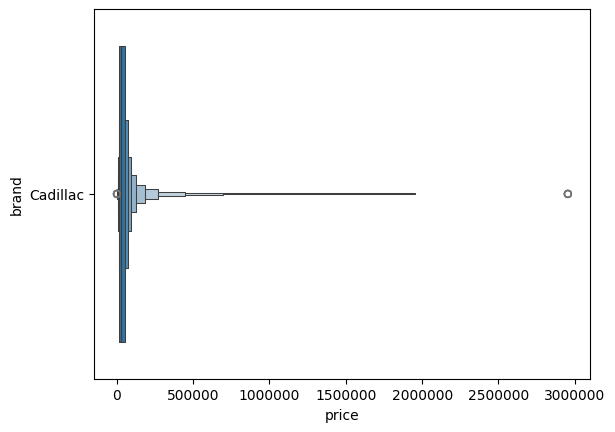

In [ ]:
sns.boxenplot(x= "price", y= "brand", data= Cadillac_data)
plt.ticklabel_format(style= "plain")

-------

### 29. **Brand vs. Transmission Types:**

Which brands prefer `automatic` or `manual` gearboxes?

In [ ]:
data.columns

Index(['id', 'brand', 'model', 'model_year', 'milage', 'fuel_type',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price', 'engine_power_hp', 'engine_volumn_liters', 'no_of_cylinders',
       'price_z', 'milage_z'],
      dtype='object')

In [ ]:
data.groupby(by= 'brand')["transmission"].value_counts()

brand  transmission                  
Acura  A/T                               529
       6-Speed A/T                       334
       Automatic                         246
       Transmission w/Dual Shift Mode    200
       6-Speed M/T                       161
                                        ... 
Volvo  9-Speed Automatic                   1
       Variable                            1
smart  2-Speed A/T                         1
       6-Speed A/T                         1
       8-Speed Automatic                   1
Name: count, Length: 1259, dtype: int64

In [ ]:
daa= data.groupby(by= 'brand')["transmission"].value_counts().reset_index()

In [ ]:
# Group by brand and find the transmission with the maximum count
max_transmission_df = daa.loc[daa.groupby('brand')['count'].idxmax()][['brand', 'transmission']]

# Reset index if needed
max_transmission_df = max_transmission_df.reset_index(drop=True)

# Display the result
print(max_transmission_df)

            brand                       transmission
0           Acura                                A/T
1            Alfa                        8-Speed A/T
2           Aston                        8-Speed A/T
3            Audi                                A/T
4             BMW                        8-Speed A/T
5         Bentley                        8-Speed A/T
6         Bugatti  7-Speed Automatic with Auto-Shift
7           Buick                  9-Speed Automatic
8        Cadillac                                A/T
9       Chevrolet                                A/T
10       Chrysler                                A/T
11          Dodge                                A/T
12           FIAT                                A/T
13        Ferrari                        8-Speed A/T
14           Ford                                A/T
15            GMC                                A/T
16        Genesis                        8-Speed A/T
17          Honda                             

So, Most of the brands prefer Automatic Transmission for their Gearbox. 

-----

### 30. **Top Brands with Clean Titles:**

Which brands are more likely to be sold with clean titles?

In [ ]:
data.columns 

Index(['id', 'brand', 'model', 'model_year', 'milage', 'fuel_type',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price', 'engine_power_hp', 'engine_volumn_liters', 'no_of_cylinders',
       'price_z', 'milage_z'],
      dtype='object')

In [ ]:
data.head()

,id,brand,model,model_year,milage,fuel_type,transmission,ext_col,int_col,accident,clean_title,price,engine_power_hp,engine_volumn_liters,no_of_cylinders,price_z,milage_z
0,0,MINI,Cooper S Base,2007,213000,Gasoline,A/T,Yellow,Gray,None reported,Yes,4200,172.0,1.6,4,-0.50,2.96
1,1,Lincoln,LS V8,2002,143250,Gasoline,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999,252.0,3.9,8,-0.49,1.56
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,A/T,Blue,Gray,None reported,Yes,13900,320.0,5.3,8,-0.38,1.43
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000,420.0,5.0,8,0.01,-0.93
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,7-Speed A/T,Black,Beige,None reported,Yes,97500,208.0,2.0,4,0.68,-1.17


In [ ]:
df_cl_title= data.groupby(by= "clean_title")["brand"].value_counts().reset_index()

In [ ]:
df_cl_title.shape

(111, 3)

In [ ]:
df_cl_title.head(2)

,clean_title,brand,count
0,None reported,Mercedes-Benz,2593
1,None reported,Audi,1686


In [ ]:
df_clean= df_cl_title[df_cl_title["clean_title"]== "Yes"].head(10) # Extracting top 10
df_clean

,clean_title,brand,count
54,Yes,Ford,21722
55,Yes,Mercedes-Benz,16579
56,Yes,BMW,15512
57,Yes,Chevrolet,15209
58,Yes,Audi,9201
59,Yes,Porsche,9159
60,Yes,Toyota,7873
61,Yes,Land,7859
62,Yes,Lexus,7623
63,Yes,Jeep,5334


<Axes: xlabel='brand', ylabel='count'>

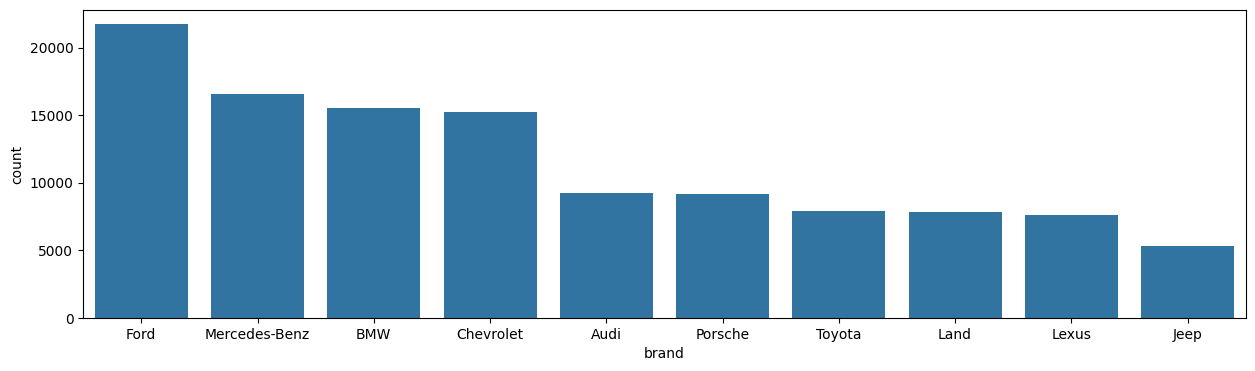

In [ ]:
plt.figure(figsize=(15, 4))
sns.barplot(x= df_clean["brand"], y= df_clean["count"])

-----

### 31. **Brand Popularity vs. Average Price:**

Compare popularity (count) with pricing — some brands may be common yet expensive.

In [ ]:
data.columns

Index(['id', 'brand', 'model', 'model_year', 'milage', 'fuel_type',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price', 'engine_power_hp', 'engine_volumn_liters', 'no_of_cylinders',
       'price_z', 'milage_z'],
      dtype='object')

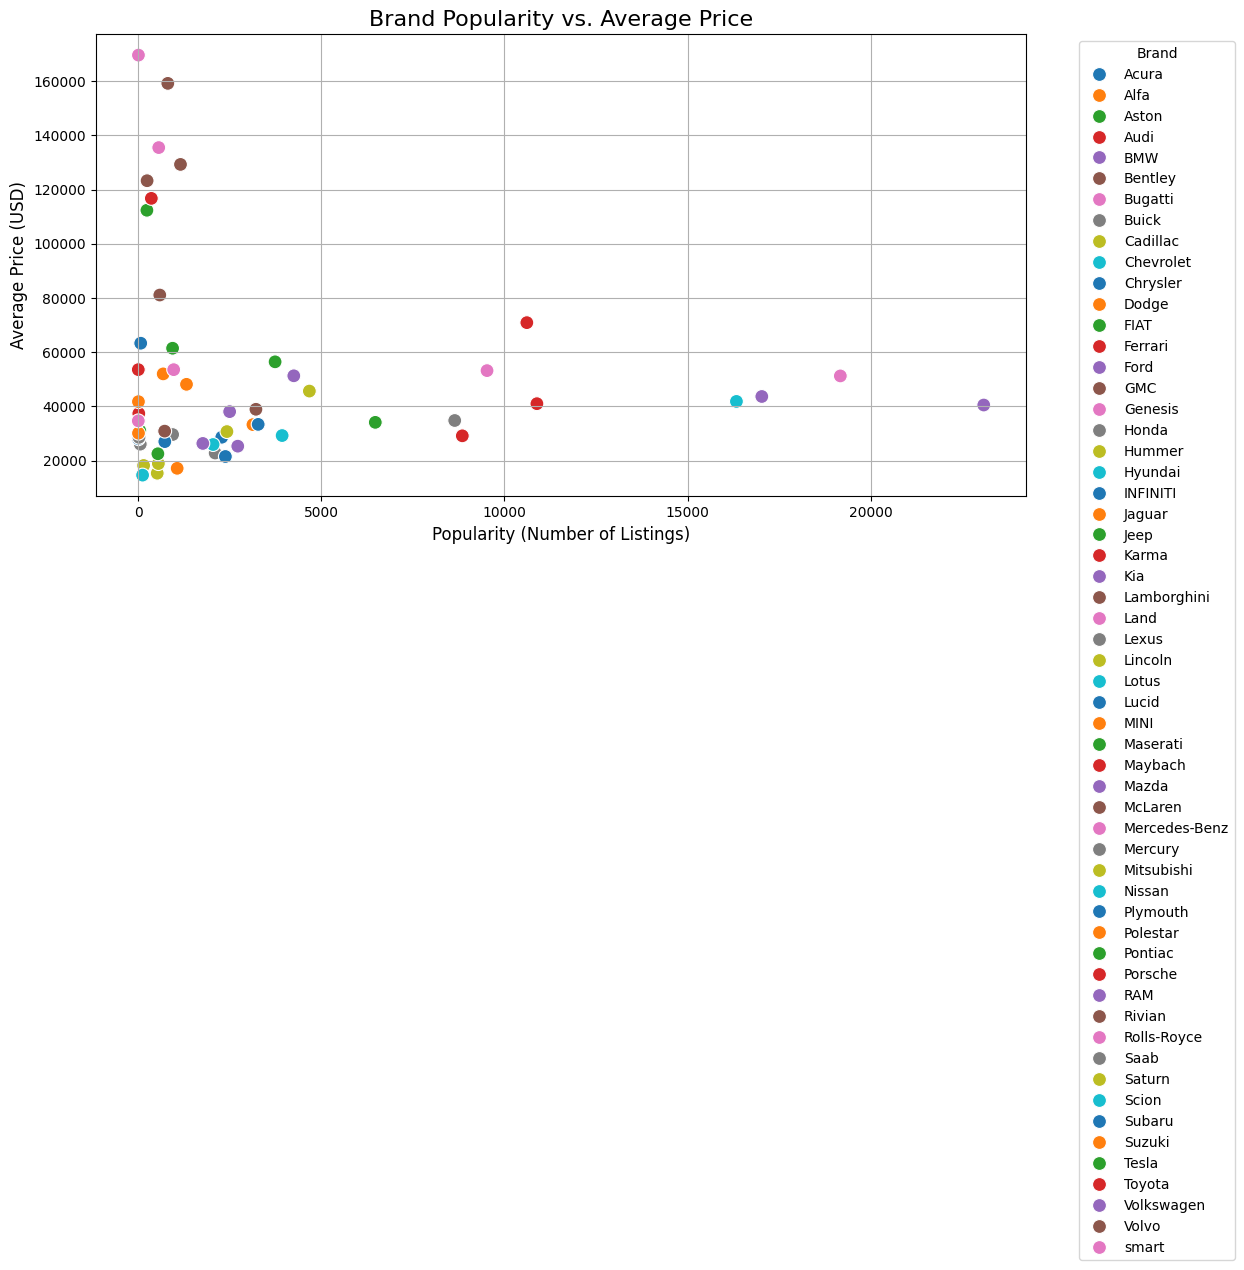

In [ ]:
# Calculate brand popularity (count of listings) and average price
brand_popularity = data['brand'].value_counts()
brand_avg_price = data.groupby('brand')['price'].mean()

# Combine the two metrics into a single DataFrame
brand_analysis = pd.DataFrame({
    'popularity': brand_popularity,
    'average_price': brand_avg_price
}).reset_index().rename(columns={'index': 'brand'})

# Plot the relationship between popularity and average price
plt.figure(figsize=(12, 6))
sns.scatterplot(data=brand_analysis, x='popularity', y='average_price', hue='brand', palette='tab10', s=100)
plt.title('Brand Popularity vs. Average Price', fontsize=16)
plt.xlabel('Popularity (Number of Listings)', fontsize=12)
plt.ylabel('Average Price (USD)', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Brand')
plt.grid(True)
plt.show()

There are some brands which are less popular but are expensive. Also, there are few brands which are very popular but have relatively low price. 

-----

### 32. **Model Year Trend by Brand:**

Analyze how modern the listings are across brands (e.g., `newer Toyotas` vs. `older BMWs`).

In [ ]:
data.columns

Index(['id', 'brand', 'model', 'model_year', 'milage', 'fuel_type',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price', 'engine_power_hp', 'engine_volumn_liters', 'no_of_cylinders',
       'price_z', 'milage_z'],
      dtype='object')

In [ ]:
dff= data.groupby(by= "brand")["model_year"].value_counts().reset_index()

In [ ]:
# List of all the listed brands:
data["brand"].to_list()

['MINI',
 'Lincoln',
 'Chevrolet',
 'Genesis',
 'Mercedes-Benz',
 'Audi',
 'Audi',
 'Chevrolet',
 'Ford',
 'BMW',
 'Chevrolet',
 'Tesla',
 'Cadillac',
 'Audi',
 'Land',
 'Mercedes-Benz',
 'GMC',
 'Land',
 'Toyota',
 'Mercedes-Benz',
 'Land',
 'Hyundai',
 'Ford',
 'Audi',
 'Volvo',
 'Toyota',
 'Ford',
 'Genesis',
 'Toyota',
 'Audi',
 'Audi',
 'Mercedes-Benz',
 'Tesla',
 'Mercedes-Benz',
 'Volkswagen',
 'BMW',
 'BMW',
 'Mercedes-Benz',
 'Mercedes-Benz',
 'Buick',
 'BMW',
 'Ford',
 'Chevrolet',
 'Mercedes-Benz',
 'Rivian',
 'RAM',
 'Chevrolet',
 'BMW',
 'Hummer',
 'Alfa',
 'INFINITI',
 'Tesla',
 'Tesla',
 'Hyundai',
 'BMW',
 'Jeep',
 'Mercedes-Benz',
 'Ford',
 'Land',
 'Mercedes-Benz',
 'Mercedes-Benz',
 'Porsche',
 'Chevrolet',
 'Chevrolet',
 'BMW',
 'Chevrolet',
 'Toyota',
 'Mercedes-Benz',
 'Toyota',
 'Mercedes-Benz',
 'McLaren',
 'Toyota',
 'Toyota',
 'Ford',
 'Honda',
 'Porsche',
 'Toyota',
 'Land',
 'Toyota',
 'BMW',
 'Audi',
 'Toyota',
 'Audi',
 'Ford',
 'Ford',
 'Ford',
 'Mercedes

In [ ]:
dff

,brand,model_year,count
0,Acura,2023,211
1,Acura,2021,187
2,Acura,2016,185
3,Acura,2019,169
4,Acura,2013,155
...,...,...,...
1342,Volvo,1999,1
1343,Volvo,2024,1
1344,smart,2007,1
1345,smart,2008,1


In [ ]:
df1= dff[dff["brand"]== "Acura"]
df1

,brand,model_year,count
0,Acura,2023,211
1,Acura,2021,187
2,Acura,2016,185
3,Acura,2019,169
4,Acura,2013,155
5,Acura,2022,126
6,Acura,2015,121
7,Acura,2020,114
8,Acura,2012,112
9,Acura,2011,111


<Axes: xlabel='model_year', ylabel='count'>

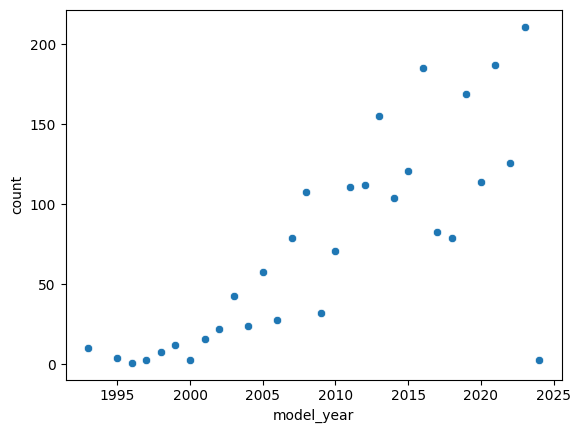

In [ ]:
# Plotting the relation between model_year and the total number of cars having that model:
sns.scatterplot(data= df1, x= "model_year", y= "count")

A general Linear Relation is seen from above plot.

In [ ]:
df2= dff[dff["brand"]== "Toyota"]
df2

,brand,model_year,count
1251,Toyota,2018,679
1252,Toyota,2020,615
1253,Toyota,2016,612
1254,Toyota,2021,575
1255,Toyota,2007,563
1256,Toyota,2022,555
1257,Toyota,2019,543
1258,Toyota,2008,479
1259,Toyota,2015,415
1260,Toyota,2023,350


<Axes: xlabel='model_year', ylabel='count'>

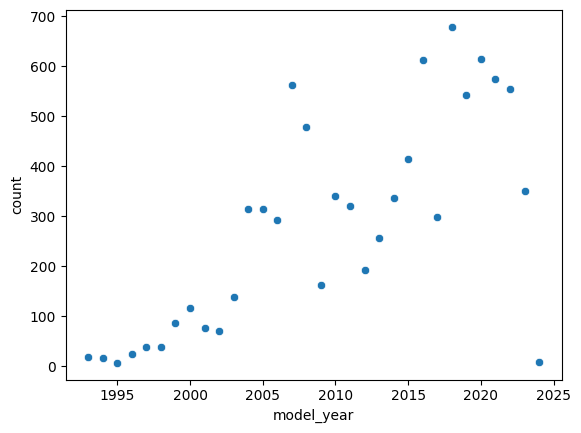

In [ ]:
# Plotting the relation between model_year and the total number of cars having that model:
sns.scatterplot(data= df2, x= "model_year", y= "count")

In [ ]:
df3= dff[dff["brand"]== "BMW"]
df3

,brand,model_year,count
103,BMW,2015,1825
104,BMW,2020,1557
105,BMW,2018,1524
106,BMW,2016,1266
107,BMW,2019,1223
108,BMW,2014,1046
109,BMW,2011,1022
110,BMW,2021,1016
111,BMW,2017,982
112,BMW,2022,915


<Axes: xlabel='model_year', ylabel='count'>

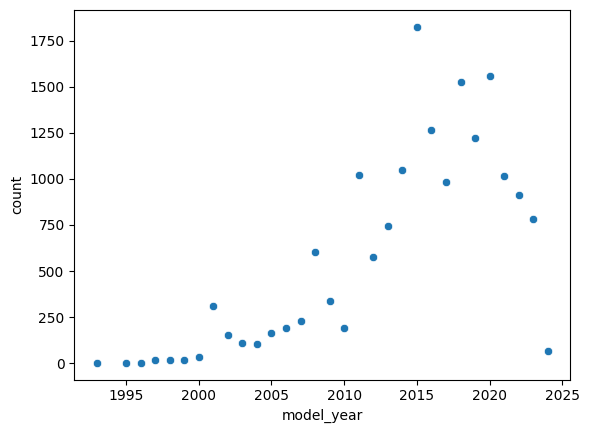

In [ ]:
# Plotting the relation between model_year and the total number of cars having that model:
sns.scatterplot(data= df3, x= "model_year", y= "count")

-----

### 33. **Milage Distribution:**

Plot histogram of mileage to see typical usage levels.

In [ ]:
data.columns

Index(['id', 'brand', 'model', 'model_year', 'milage', 'fuel_type',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price', 'engine_power_hp', 'engine_volumn_liters', 'no_of_cylinders',
       'price_z', 'milage_z'],
      dtype='object')

<Axes: xlabel='milage', ylabel='Count'>

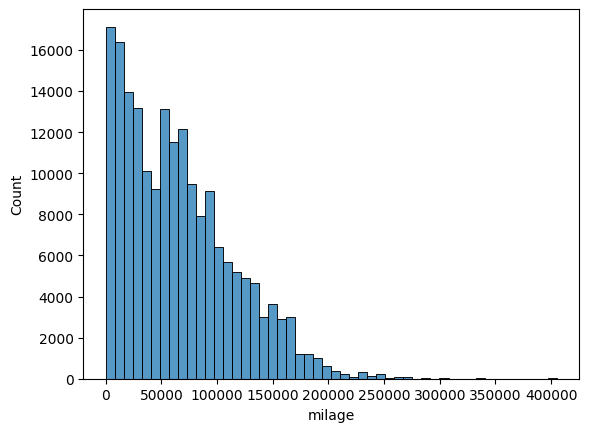

In [ ]:
sns.histplot(data= data, x= "milage", bins= 50,)

So, the distribution of `milage` column is `highly right-skewed`. There are a lot of listings which have traveled less than 5000 Units. Very few listings having milage greater than 200000 Units as seen from the long right tail.

----

### 34. **Milage by Model Year:**

See how newer models generally have lower mileage.

In [ ]:
data.columns

Index(['id', 'brand', 'model', 'model_year', 'milage', 'fuel_type',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price', 'engine_power_hp', 'engine_volumn_liters', 'no_of_cylinders',
       'price_z', 'milage_z'],
      dtype='object')

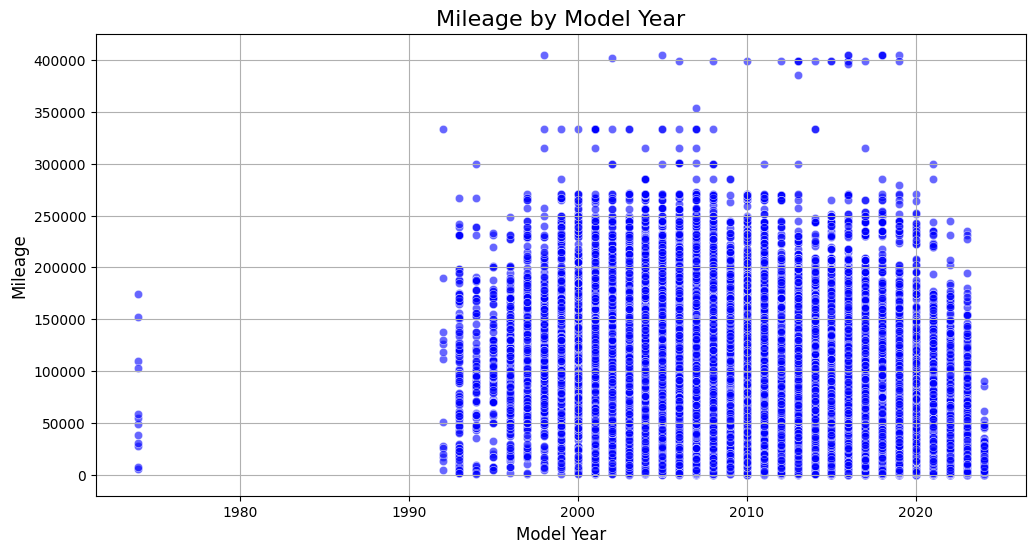

In [ ]:
# Scatter plot to visualize mileage by model year
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data, x='model_year', y='milage', alpha=0.6, color='blue')
plt.title('Mileage by Model Year', fontsize=16)
plt.xlabel('Model Year', fontsize=12)
plt.ylabel('Mileage', fontsize=12)
plt.grid(True)
plt.show()

Here, new models have generally low milage but it is not that clear because, newer models from 1992-93 generally shows a similar patterns. 

-----

### 35. **Milage vs. Price with Regression:**

Add a regression line to visualize trend between mileage and price.

In [ ]:
data.columns

Index(['id', 'brand', 'model', 'model_year', 'milage', 'fuel_type',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price', 'engine_power_hp', 'engine_volumn_liters', 'no_of_cylinders',
       'price_z', 'milage_z'],
      dtype='object')

In [ ]:
mi_pr= data[["milage", "price"]]

In [ ]:
mi_pr.head(5)

,milage,price
0,213000,4200
1,143250,4999
2,136731,13900
3,19500,45000
4,7388,97500


Text(0.5, 1.0, 'Price vs Milage:')

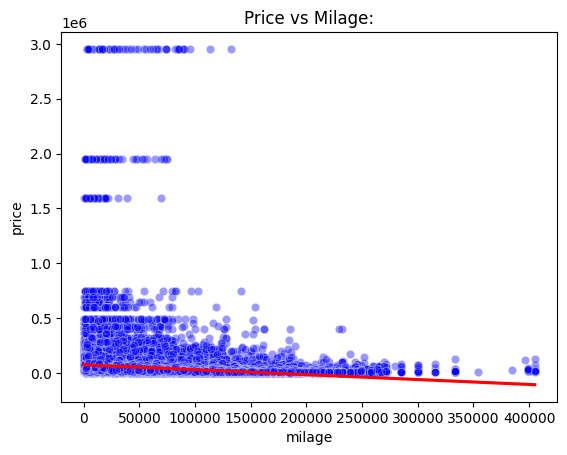

In [ ]:
sns.scatterplot(data= mi_pr, x= "milage", y= "price", alpha= 0.4, color= 'blue')
# add regression line to this figure:   
sns.regplot(data= mi_pr, x= "milage", y= "price", scatter=False, color= 'red')
plt.title("Price vs Milage:")

The Regression Line makes no sense here. But a general trend can be captured here. Price of Cars having very high milage value are generally low. Also, Low milage cars have relatively high price and many such cars have price in millions.

-------

### 36. **Milage by Transmission:**

Compare usage between manual and automatic cars.

In [ ]:
data.columns

Index(['id', 'brand', 'model', 'model_year', 'milage', 'fuel_type',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price', 'engine_power_hp', 'engine_volumn_liters', 'no_of_cylinders',
       'price_z', 'milage_z'],
      dtype='object')

In [ ]:
data.head(2)

,id,brand,model,model_year,milage,fuel_type,transmission,ext_col,int_col,accident,clean_title,price,engine_power_hp,engine_volumn_liters,no_of_cylinders,price_z,milage_z
0,0,MINI,Cooper S Base,2007,213000,Gasoline,A/T,Yellow,Gray,None reported,Yes,4200,172.0,1.6,4,-0.50,2.96
1,1,Lincoln,LS V8,2002,143250,Gasoline,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999,252.0,3.9,8,-0.49,1.56


In [322]:
data["transmission"].value_counts()

transmission
A/T                                                   49904
8-Speed A/T                                           20645
Transmission w/Dual Shift Mode                        19255
6-Speed A/T                                           18044
6-Speed M/T                                           11998
7-Speed A/T                                           11124
Automatic                                             10691
8-Speed Automatic                                      8431
10-Speed A/T                                           8044
9-Speed A/T                                            3866
5-Speed A/T                                            3217
10-Speed Automatic                                     3164
6-Speed Automatic                                      2799
4-Speed A/T                                            2546
5-Speed M/T                                            2409
9-Speed Automatic                                      2325
CVT Transmission           

In [323]:
# Here, `Manual`, `manual`, `Mt`, `M/T` all meaning Manual:

data['transmission'] = data['transmission'].replace(
    to_replace=r'.*\b(Manual|manual|M/T|Mt)\b.*', 
    value='M/T', 
    regex=True
)

In [324]:
# Replace entire string if it contains any of the specified terms
# Replace if string contains any of the keywords (case-sensitive match)
data['transmission'] = data['transmission'].replace(
    to_replace=r'.*\b(Automatic|automatic|A/T|AT\b).*',
    value='A/T',
    regex=True
)

In [325]:
data["transmission"].unique()

array(['A/T', 'Transmission w/Dual Shift Mode', 'CVT Transmission', 'M/T',
       'Transmission Overdrive Switch', 'F', 'CVT-F', '–', '2', '7-Speed',
       'Variable', 'Single-Speed Fixed Gear',
       'SCHEDULED FOR OR IN PRODUCTION', '6-Speed'], dtype=object)

In [328]:
at= data[data["transmission"]== "A/T"]

In [329]:
man= data[data["transmission"]=="M/T"]

In [331]:
at.head()

,id,brand,model,model_year,milage,fuel_type,transmission,ext_col,int_col,accident,clean_title,price,engine_power_hp,engine_volumn_liters,no_of_cylinders,price_z,milage_z
0,0,MINI,Cooper S Base,2007,213000,Gasoline,A/T,Yellow,Gray,None reported,Yes,4200,172.0,1.6,4,-0.50,2.96
1,1,Lincoln,LS V8,2002,143250,Gasoline,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999,252.0,3.9,8,-0.49,1.56
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,A/T,Blue,Gray,None reported,Yes,13900,320.0,5.3,8,-0.38,1.43
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,A/T,Black,Beige,None reported,Yes,97500,208.0,2.0,4,0.68,-1.17
5,5,Audi,A6 2.0T Sport,2018,40950,Gasoline,A/T,White,–,None reported,Yes,29950,252.0,2.0,4,-0.18,-0.50


In [332]:
man.head()

,id,brand,model,model_year,milage,fuel_type,transmission,ext_col,int_col,accident,clean_title,price,engine_power_hp,engine_volumn_liters,no_of_cylinders,price_z,milage_z
81,81,Toyota,Camry LE,2000,90400,Gasoline,M/T,Beige,Beige,None reported,Yes,11999,160.0,2.4,4,-0.40,0.50
88,88,Jeep,Wrangler X,2002,110000,Gasoline,M/T,Silver,Gray,None reported,Yes,9500,190.0,4.0,Straight 6,-0.44,0.89
89,89,Ford,Focus RS Base,2017,29720,Gasoline,M/T,Gray,Gray,None reported,Yes,29500,350.0,2.3,4,-0.18,-0.72
98,98,Nissan,Xterra S,2007,100900,Gasoline,M/T,Black,Gray,At least 1 accident or damage reported,Yes,9500,261.0,4.0,V6,-0.44,0.71
104,104,BMW,M3 Base,2001,69764,Gasoline,M/T,Red,Black,None reported,Yes,6800,333.0,3.2,Straight 6,-0.47,0.08


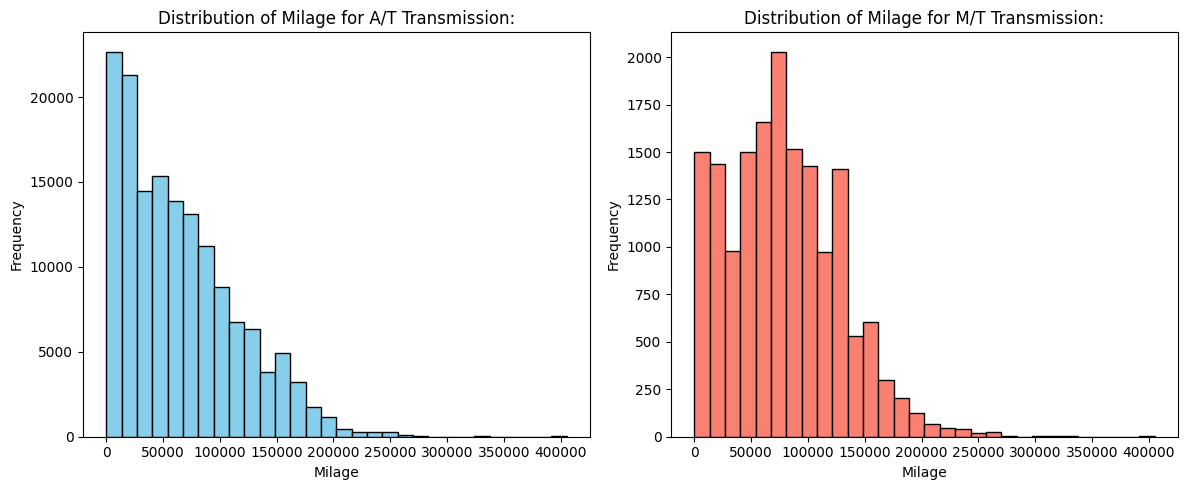

In [338]:
# Create subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot first histogram
axes[0].hist(data= at, x= "milage", bins=30, color='skyblue', edgecolor='black')
axes[0].set_title('Distribution of Milage for A/T Transmission:')
axes[0].set_xlabel('Milage')
axes[0].set_ylabel('Frequency')

# Plot second histogram
axes[1].hist(data=man,  x= "milage", bins=30, color='salmon', edgecolor='black')
axes[1].set_title('Distribution of Milage for M/T Transmission:')
axes[1].set_xlabel('Milage')
axes[1].set_ylabel('Frequency')

# Layout adjustment
plt.tight_layout()
plt.show()

-----

### 37. **Engine Size by Fuel Type:**

Find out if diesel engines are generally larger than petrol ones, etc.

In [339]:
data.columns

Index(['id', 'brand', 'model', 'model_year', 'milage', 'fuel_type',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price', 'engine_power_hp', 'engine_volumn_liters', 'no_of_cylinders',
       'price_z', 'milage_z'],
      dtype='object')

In [341]:
data["engine_volumn_liters"].unique()

array(['1.6', '3.9', '5.3', '5.0', '2.0', '3.0', 'V6 24V PDI', '3.6',
       'Motor Electric Fuel', '6.2', '4.4', '4.0', '4.6', 'V10 40V PDI',
       '3.7', '5.7', '6.7', 'Electric Motor Electric', '3.5', '2.8',
       '5.5', 'V6 24V GDI', 'V8 32V GDI', 'V8 16V MPFI', '5.4', '6.8',
       'Motor - Standard', '3.8', '2.5', 'V8 32V MPFI', '2.4', '3.3',
       '2.3', 'I4 16V PDI', '3.2', '4.7', '1.8', 'I4 16V GDI', '2.7', '',
       'V6 24V MPFI', '3.4', '6.0', '4.8', '5.6', '4.3', 'V8 16V GDI',
       '4.2', 'H6 24V GDI', 'H4 16V MPFI', '5.2', 'I3 12V PDI', '6.4',
       '8.3', 'V12 48V GDI', 'I6 24V DDI', 'H6 24V MPFI', '2.1', '1.4',
       '4.5', '1.3', '2.9', 'V8 32V PDI', 'Turbo Diesel V-8', '1.7',
       '6.6', '8 Cylinder Engine', '2.2', 'I4 16V MPFI', '6.3',
       'I6 24V GDI', '6.1', 'H4 16V GDI', '7.3', 'V10 40V GDI',
       'I3 12V GDI', '6.5', 'V12 48V MPFI', '1.5', '0.65', 'V6 GDI DOHC',
       'Range Battery', 'V8 32V DDI', '6.75', '7.0', '24V SOHC I-VTEC',
       'I4 16V',

In [ ]:
d

In [ ]:
sns.barplot(data= data, x= )